# Predicción de resultados de fútbol usando Aprendizaje Automático Federado: Creación de características y Análisis de Datos Exploratorio.

### Curso académico 2023-2024

#### Autor:

- Pablo Rodríguez Royo

---


En primer lugar se analizará los conjuntos de datos iniciales extraidos de Kaggle, mediante el siguiente enlace:

- `European Soccer Database`: https://www.kaggle.com/datasets/hugomathien/soccer

Este conjunto de datos abarca una amplia gama de ligas de fútbol en Europa, incluidas algunas de las ligas más prestigiosas como la Premier League inglesa, La Liga española, Serie A italiana, Bundesliga alemana, entre otras. Entre los datos disponibles se encuentran resultados de partidos, alineaciones, estadísticas de jugadores (como goles marcados, asistencias, tarjetas amarillas y rojas), características de los equipos (como nombre, clasificación, presupuesto, entre otros) y detalles de las ligas (como nombre, país, temporada, etc.).

 Los datos disponibles abarcan 11 temporadas completas desde el año 2008 hasta el 2016. 

Mediante este notebook se tratará de analizar y preprocesar los datos, para más tarde poder realizar predicciones ajustadas y precisas mediante el **aprendizaje federado**.
Partiendo de este enlace nos encontramos con 7 conjuntos de datos diferentes que conformarán el total de los datos utilizados durante el trabajo de fin de grado:

- `Country`: Paises donde se juegan las diferentes ligas
- `League` : Ligas de todos los paises disponibles
- `Match`: Todos los partidos desde 2008 hasta 2016 de todas las ligas.
- `Player`: Información de todos los jugadores que han pasado por equipos de las ligas europeas durante los años citados.
- `Player attributes` : Características futbolísticas extraidas del videojuego FIFA de cada jugador por año (las características de los jugadores en el videoujuego se extraen a partir de estadísticas reales) .
- `Team` : Todos los equipos de las ligas
- `Team attributes` : Características de todos los equipos extraidos del videojuego FIFA.



# 1. Preliminares

Importamos las librerias necesarias para el funcionamiento correcto de la libreta.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3
import numpy as np
from numpy import random
import xml.etree.ElementTree as ET
import os
import matplotlib.pyplot as plt
from joypy import joyplot
from urllib.request import urlopen

from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager

import warnings
warnings.filterwarnings('ignore')


Tras descargar el archivo `database.sqlite` de la página de Kaggle, separaremos cada una de las 7 tablas para poder manejarlas y analizarlas por separado.

In [5]:
#load data (make sure you have downloaded database.sqlite)
with sqlite3.connect('database.sqlite') as con:
    countries = pd.read_sql_query("SELECT * from Country", con)
    matches = pd.read_sql_query("SELECT * from Match", con)
    leagues = pd.read_sql_query("SELECT * from League", con)
    teams = pd.read_sql_query("SELECT * from Team", con)
    players = pd.read_sql_query("SELECT * from Player", con)
    players_attributes = pd.read_sql_query("SELECT * from Player_Attributes", con)
    team_attributes = pd.read_sql_query("SELECT * from Team_Attributes", con)

In [4]:
matches[(matches['league_id'] == 1) & (matches['season'] == '2013/2014')]

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
1236,1237,1,1,2013/2014,1,2014-03-29 00:00:00,1677179,8475,9989,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1237,1238,1,1,2013/2014,1,2014-03-29 00:00:00,1677180,9991,8573,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1238,1239,1,1,2013/2014,2,2014-04-05 00:00:00,1677181,9989,9991,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1239,1240,1,1,2013/2014,2,2014-04-05 00:00:00,1677182,8573,8475,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1240,1241,1,1,2013/2014,3,2014-04-12 00:00:00,1677183,9991,8475,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1241,1242,1,1,2013/2014,3,2014-04-12 00:00:00,1677184,8573,9989,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1242,1243,1,1,2013/2014,4,2014-04-19 00:00:00,1677185,8475,9991,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1243,1244,1,1,2013/2014,4,2014-04-19 00:00:00,1677186,9989,8573,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1244,1245,1,1,2013/2014,5,2014-04-26 00:00:00,1677187,9989,8475,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1245,1246,1,1,2013/2014,5,2014-04-26 00:00:00,1677188,8573,9991,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#guarda cada tabla en mi directorio actual
countries.to_csv('countries.csv', index=False)
matches.to_csv('matches_inicial.csv', index=False)
leagues.to_csv('leagues.csv', index=False)
teams.to_csv('teams.csv', index=False)
players.to_csv('players.csv', index=False)
players_attributes.to_csv('players_attributes.csv', index=False)
team_attributes.to_csv('team_attributes.csv', index=False)



Fijaremos la semilla para que los experimentos sean reproducibles:

In [4]:
random.seed(42)

También fijaremos el tamaño por defecto de las gráficas:

In [5]:
plt.rcParams["figure.figsize"] = (30, 20)

En este punto, ya podemos empezar a analizar nuestros datos, iremos tabla por tabla haciendo un análisis mediante estadísticos y visualizaciones.

## Matches

Empezaremos analizando nuestra tabla `Matches` que será nuestra base para luego realizar las predicciones.

In [6]:
matches.sample(5)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
13049,13050,10257,10257,2015/2016,23,2016-02-03 00:00:00,2060332,8543,9875,0,...,NaN,4.30,3.4,1.87,NaN,NaN,NaN,NaN,NaN,NaN
11127,11128,10257,10257,2010/2011,2,2010-09-12 00:00:00,888171,9888,8535,1,...,2.2,3.60,3.2,2.20,3.4,3.1,2.15,3.25,3.1,2.25
12644,12645,10257,10257,2014/2015,21,2015-02-01 00:00:00,1786211,8524,8529,2,...,NaN,2.25,3.2,3.75,NaN,NaN,NaN,NaN,NaN,NaN
15894,15895,15722,15722,2008/2009,29,2009-05-23 00:00:00,506754,8569,8322,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23807,23808,21518,21518,2014/2015,10,2014-11-01 00:00:00,1778124,8560,9864,0,...,NaN,2.20,3.5,3.50,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
for column in matches.columns:
    print(column)

id
country_id
league_id
season
stage
date
match_api_id
home_team_api_id
away_team_api_id
home_team_goal
away_team_goal
home_player_X1
home_player_X2
home_player_X3
home_player_X4
home_player_X5
home_player_X6
home_player_X7
home_player_X8
home_player_X9
home_player_X10
home_player_X11
away_player_X1
away_player_X2
away_player_X3
away_player_X4
away_player_X5
away_player_X6
away_player_X7
away_player_X8
away_player_X9
away_player_X10
away_player_X11
home_player_Y1
home_player_Y2
home_player_Y3
home_player_Y4
home_player_Y5
home_player_Y6
home_player_Y7
home_player_Y8
home_player_Y9
home_player_Y10
home_player_Y11
away_player_Y1
away_player_Y2
away_player_Y3
away_player_Y4
away_player_Y5
away_player_Y6
away_player_Y7
away_player_Y8
away_player_Y9
away_player_Y10
away_player_Y11
home_player_1
home_player_2
home_player_3
home_player_4
home_player_5
home_player_6
home_player_7
home_player_8
home_player_9
home_player_10
home_player_11
away_player_1
away_player_2
away_player_3
away_player_4
a

Como se puede ver tenemos una gran cantidad de variables predictoras en concreto 113, que a lo largo de esta libreta iremos reduciendo para quedarnos con las de mayor poder discriminatorio con respecto a la variable objetivo.

En cuanto a nuestra variable objetivo o clase, la tendremos que calcular comparando los goles del equipo local con los del equipo visitante y será **categórica**. Esta tendrá tres posibles valores:

- `1`: Si el equipo local resultó ganador del partido.
- `X`: Si el resultado final fue un empate.
- `2`: Si el equipo visitante resultó ganador del partido.

Para las variables predictoras, realizaremos un resumen de la información que nos aportan algunas de ellas:


- `id`: Identificador único para cada registro en el conjunto de datos.
- `country_id`: Identificador del país en el que se llevó a cabo el partido.
- `league_id`: Identificador de la liga en la que se jugó el partido.
- `season`: La temporada en la que se llevó a cabo el partido.
- `stage`: Jornada de la temporada en la que se jugó el partido.
- `date`: La fecha en la que se jugó el partido.
- `match_api_id`: Identificador único del partido.
- `home_team_api_id`: Identificador del equipo local.
- `away_team_api_id`: Identificador del equipo visitante.
- `home_team_goal`: Cantidad de goles marcados por el equipo local en el partido.
- `away_team_goal`: Cantidad de goles marcados por el equipo visitante en el partido.
- `home_player_X1` a `home_player_X11`: Coordenadas X del campo para la posición inicial de los jugadores locales.
- `away_player_X1` a `away_player_X11`: Coordenadas X del campo para la posición inicial de los jugadores visitantes.
- `home_player_Y1` a `home_player_Y11`: Coordenadas Y del campo para la posición inicial de los jugadores locales.
- `away_player_Y1` a `away_player_Y11`: Coordenadas Y del campo para la posición inicial de los jugadores visitantes.
- `home_player_1` a `home_player_11`: Identificador de los jugadores locales.
- `away_player_1` a `away_player_11`: Identificador de los jugadores visitantes.
- `goal`: Goles ocurridos durante el partido.
- `shoton`: Tiros a portería durante el partido.
- `shotoff`: Tiros fuera de la portería durante el partido.
- `foulcommit`: Faltas cometidas durante el partido.
- `card`: Tarjetas mostradas durante el partido.
- `cross`: Centros al área durante el partido.
- `corner`: Saques de esquina durante el partido.
- `possession`: Estadísticas de posesión de balón durante el partido.
- `B365H`, `B365D`, `B365A`, `BWH`, `BWD`, `BWA`, `IWH`, `IWD`, `IWA`, `LBH`, `LBD`, `LBA`, `PSH`, `PSD`, `PSA`, `WHH`, `WHD`, `WHA`, `SJH`, `SJD`, `SJA`, `VCH`, `VCD`, `VCA`, `GBH`, `GBD`, `GBA`, `BSH`, `BSD`, `BSA`: Cuotas de apuestas para el resultado del partido ofrecidas por diferentes casas de apuestas.

In [8]:
matches.shape

(25979, 115)

En total tenemos 25979 partidos en la base de datos.

In [9]:
# Registros duplicados
matches.duplicated().sum()

0

In [10]:
# Valores perdidos totales
matches.isna().sum().sum()

407395

In [11]:
# Número de registros con valores perdidos
matches.isnull().any(axis=1).sum()

24217

En nuestro conjunto no hay registros duplicados, pero tenemos un problema con los valores perdidos ya que tenemos 407395 en total y 24217 registros con algún valor perdido.

El problema con los valores perdidos se irá solucionando a medida que vayamos trabajando con los datos.

In [12]:
matches.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


In [13]:
matches['year'] = matches['season'].apply(lambda x: int(x.split('/')[0])).astype(int)

## Countries

In [14]:
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


Aquí se observa que no hay registros duplicados ni valores perdidos.
La información que contiene esta tabla es los nombres de los paises y sus identificadores.

## Teams

In [15]:
teams.sample(5)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
295,49837,10191,1715.0,FC Thun,THU
111,15634,9911,160.0,VfL Bochum,BOC
38,3470,8586,18.0,Tottenham Hotspur,TOT
154,25791,9891,111657.0,Frosinone,FRO
29,3461,8472,106.0,Sunderland,SUN


In [16]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


En este caso vamos a trabajar con la tabla de equipos, la cual contiene la información de los equipos que han participado en las ligas de fútbol.

Las variables realmente interesantes aquí son `team_api_id` que nos servirá para identificar a cada equipo y `team_long_name` que nos da el nombre del equipo.

In [17]:
teams.shape

(299, 5)

In [18]:
teams.duplicated().sum()

0

In [19]:
teams.isna().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

In [20]:
teams.describe()

,id,team_api_id,team_fifa_api_id
count,299.000000,299.000000,288.000000
mean,23735.301003,12340.521739,21534.305556
std,15167.914719,25940.411135,42456.439408
min,1.000000,1601.000000,1.000000
25%,9552.500000,8349.000000,178.750000
50%,22805.000000,8655.000000,673.500000
75%,36250.500000,9886.500000,1910.750000
max,51606.000000,274581.000000,112513.000000


Esta tabla contiene 299 resgitros y 5 variables. No hay registros duplicados y tenemos 11 valores perdidos pero todos pertenecen a `team_fifa_api_id `que realmente no la vamos a necesitar para nuestro propósito.


## Teams Attributes

In [21]:
for column in countries.columns:
    print(column)

id
name


In [22]:
team_attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


En la tabla que observamos se encuentran los atributos de los equipos. Estos atributos pueden incluir una amplia variedad de características relacionadas con el equipo, como su estilo de juego, habilidades específicas, fortalezas y debilidades.
Pero se ha considerado que esta información no es del todo relevante a la hora de predecir el resultado de un partido, por lo que **no se usará**.

In [23]:
team_attributes.duplicated().sum()

0

In [24]:
team_attributes.isna().sum().sum()

969

In [25]:
team_attributes.shape

(1458, 25)

In [26]:
team_attributes.describe()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


## Leagues

In [27]:
leagues

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


En esta tabla tenemos información sobre las ligas de fútbol de diferentes países. 

## Players

In [28]:
players.sample(5)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
3771,3775,37482,Gerard Pique,152729,1987-02-02 00:00:00,193.04,187
10573,10589,39339,Veigar Pall Gunnarsson,127432,1980-03-21 00:00:00,175.26,172
10827,10843,31085,Won-Hee Cho,139443,1983-04-17 00:00:00,177.80,159
1653,1656,33100,Chaouki Ben Saada,111503,1984-07-01 00:00:00,170.18,143
2106,2109,40957,Daniel Candeias,189468,1988-02-25 00:00:00,177.80,172


Como se puede observar en esta tabla, esta contenida la información de los jugadores que han participado en los partidos de alguna de las ligas de futbol que se encuentran en la base de datos. 

No hay mucha información relevante para nuestro problema aquí ya que no nos aporta información sobre cómo juegan y por tanto si pueden ser diferenciales a la hora de predecir resultados.



In [29]:
players.shape

(11060, 7)

In [30]:
players.duplicated().sum()

0

In [31]:
players.isna().sum().sum()

0

In [32]:
players.describe()

,id,player_api_id,player_fifa_api_id,height,weight
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,5537.511392,156582.427215,165664.910488,181.867445,168.380289
std,3197.692647,160713.700624,58649.928360,6.369201,14.990217
min,1.000000,2625.000000,2.000000,157.480000,117.000000
25%,2767.750000,35555.500000,151889.500000,177.800000,159.000000
50%,5536.500000,96619.500000,184671.000000,182.880000,168.000000
75%,8306.250000,212470.500000,203883.250000,185.420000,179.000000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000


## Player Attributes

In [33]:
players_attributes.sample(5)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
12940,12941,163570,23528,2011-08-30 00:00:00,70.0,72.0,right,medium,high,66.0,...,74.0,70.0,62.0,73.0,71.0,5.0,11.0,10.0,8.0,5.0
18475,18476,196896,362261,2012-08-31 00:00:00,60.0,65.0,right,medium,medium,53.0,...,45.0,28.0,60.0,66.0,59.0,6.0,5.0,14.0,11.0,6.0
713,714,197233,189181,2007-02-22 00:00:00,57.0,75.0,right,medium,medium,23.0,...,33.0,22.0,23.0,23.0,20.0,58.0,59.0,47.0,39.0,74.0
172043,172044,183344,97752,2016-01-14 00:00:00,69.0,69.0,right,medium,low,72.0,...,61.0,69.0,43.0,43.0,40.0,8.0,6.0,15.0,11.0,14.0
174669,174670,192526,163998,2009-08-30 00:00:00,69.0,73.0,right,medium,low,53.0,...,65.0,68.0,22.0,23.0,15.0,7.0,23.0,59.0,23.0,23.0


In [34]:
players_attributes.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

En esta tabla sin embargo si que podemos encontrar información relevante sobre el juego de los jugadores, recordemos que estos datos se han extraido del videojuego FIFA, pero a su vez, los datos del videojuego se han extraido de la realidad, por lo que podemos considerar que estos datos son bastante fiables. 

Los atributos que encontramos pueden proporcionar una visión detallada de las habilidades y características individuales de los jugadores, lo que puede ser útil para evaluar su rendimiento, potencial y contribución al equipo. Al tener tantas estadísticas nos quedaremos con la realmente interesante que es `overall_rating`, esto nos ofrece una valoración media de las características de un jugador valorada del 1-100, el jugador tiene una valoración media por cada año que ha jugado, por lo que tambien es importante tener en cuenta la variable `date`.


In [35]:
# Nos quedamos solo con el id del jugador, la fecha y valoración media
players_attributes = players_attributes[['date', 'player_api_id', 'overall_rating']]

In [36]:
players_attributes.duplicated().sum()

1

In [37]:
# eliminamos registros duplicados
players_attributes = players_attributes.drop_duplicates()

In [38]:
players_attributes[players_attributes["overall_rating"].isna()]

,date,player_api_id,overall_rating
483,2007-02-22 00:00:00,31684,NaN
983,2007-02-22 00:00:00,29904,NaN
1752,2007-02-22 00:00:00,24159,NaN
2089,2007-02-22 00:00:00,31916,NaN
2482,2007-02-22 00:00:00,37249,NaN
...,...,...,...
182587,2007-02-22 00:00:00,25538,NaN
183249,2007-02-22 00:00:00,32633,NaN
183309,2007-02-22 00:00:00,33823,NaN
183361,2007-02-22 00:00:00,25772,NaN


In [39]:
players_attributes.describe()

,player_api_id,overall_rating
count,183977.000000,183142.000000
mean,135901.176810,68.600015
std,136928.002351,7.041139
min,2625.000000,33.000000
25%,34763.000000,64.000000
50%,77741.000000,69.000000
75%,191080.000000,73.000000
max,750584.000000,94.000000


En total hay 183977 registros, de ellos 835 contienen valores perdidos en la variable `overall_rating`, pero esto trataremos de solucionarlo más adelante.

# 2. Transformaciones pre-análisis

In [40]:
leagues_copy = countries.merge(leagues,on='id',suffixes=('', '_y'))

Vamos a juntar la tabla `leagues` con `countries` para tener la información más compactada.

In [41]:
leagues_copy

,id,name,country_id,name_y
0,1,Belgium,1,Belgium Jupiler League
1,1729,England,1729,England Premier League
2,4769,France,4769,France Ligue 1
3,7809,Germany,7809,Germany 1. Bundesliga
4,10257,Italy,10257,Italy Serie A
5,13274,Netherlands,13274,Netherlands Eredivisie
6,15722,Poland,15722,Poland Ekstraklasa
7,17642,Portugal,17642,Portugal Liga ZON Sagres
8,19694,Scotland,19694,Scotland Premier League
9,21518,Spain,21518,Spain LIGA BBVA


También vamos a transformar el tipo de dato de la columna date a datetime.

In [42]:
matches["date"] = pd.to_datetime(matches["date"])

Llegados a este punto, es muy importante definir y construir la que será la variable objetivo. La construiremos a partir de los goles que ha marcado cada equipo en un partido, de forma que:

- `0`: el equipo local es el ganador
- `1`: empate entre mabos equipos
- `2`: el equipo visitante es el ganador

Al final tenemos una variable objetivo **discreta**.

In [43]:
matches_resultado = pd.DataFrame()
# Definir las condiciones y los valores correspondientes
conditions = [
    matches['home_team_goal'] > matches['away_team_goal'],
    matches['home_team_goal'] == matches['away_team_goal'],
    matches['home_team_goal'] < matches['away_team_goal']
]
values = [0, 1, 2]

# Añadir una nueva columna con los valores según las condiciones
matches_resultado['RESULT'] = np.select(conditions, values)
matches['RESULT'] = matches_resultado['RESULT']

In [44]:
# Comprobamos que los cambios se han realizado correctamente
matches[["home_team_goal", "away_team_goal", 'RESULT']].sample(10)

,home_team_goal,away_team_goal,RESULT
5122,2,1,0
3384,3,1,0
12367,2,0,0
17277,1,2,2
4219,1,0,0
22684,3,1,0
14942,3,2,0
7166,3,1,0
5831,2,2,1
6695,2,2,1


## Creando nuevas variables apartir de XML

Muchas de las variables predictoras de la tabla `matches` contienen información codificada en XML, por lo que vamos a extraerla y a añadirla al dataframe, para poder analizarla correctamente. 

Cada una de estas variables contiene información del equipo local y visitante por lo que hay que separar la información para ambos equipos.

In [45]:
# Mostramos las variables con la información codificada.
matches[['shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession']].sample(5)

,shoton,shotoff,foulcommit,card,cross,corner,possession
21838,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />
15745,None,None,None,None,None,None,None
13933,None,None,None,None,None,None,None
12135,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />
18827,None,None,None,None,None,None,None


In [46]:
def calculate_stats_both_teams(xml_document, home_team, away_team, card_type='y'):
    #Si el xml_document está vacío o termina con />, no hay estadísticas que extraer
    if pd.isna(xml_document) or xml_document.strip().endswith('/>'):
        return None, None
    
    assert card_type == 'y' or card_type == 'r', "Please enter either y or r"
    tree = ET.fromstring(xml_document)
    stat_home_team = 0
    stat_away_team = 0
    
    #Dealing with card type using the root element & the card type argument
    if tree.tag == 'card':
        for child in tree.iter('value'):
            #Some xml docs have no card_type element in the tree. comment section seems to have that information
            try:
                if child.find('comment').text == card_type:
                    if int(child.find('team').text) == home_team:
                        stat_home_team += 1
                    else:
                        stat_away_team += 1
            except AttributeError:
                #Some values in the xml doc don't have team values, so there isn't much we can do at this stage
                pass
                
        return stat_home_team, stat_away_team
    
    #Lets take the last possession stat which is available from the xml doc
    if tree.tag == 'possession':
        try:
            last_value = [child for child in tree.iter('value')][-1]
            return int(last_value.find('homepos').text), int(last_value.find('awaypos').text)
        except:
            return None, None
    
    #Taking care of all other stats by extracting based on the home team & away team api id's
    for team in [int(stat.text) for stat in tree.findall('value/team')]:
        if team == home_team: 
            stat_home_team += 1
        else:
            stat_away_team += 1
    return stat_home_team, stat_away_team


matches[['TIROS_P_L','TIROS_P_V']] = matches[['shoton','home_team_api_id','away_team_api_id']].apply(lambda x: calculate_stats_both_teams(x['shoton'],x['home_team_api_id'],x['away_team_api_id']), axis = 1,result_type="expand")  
matches[['TIROS_L','TIROS_V']] = matches[['shotoff','home_team_api_id','away_team_api_id']].apply(lambda x: calculate_stats_both_teams(x['shotoff'],x['home_team_api_id'],x['away_team_api_id']), axis = 1,result_type="expand") 
matches[['FALTAS_L','FALTAS_V']] = matches[['foulcommit','home_team_api_id','away_team_api_id']].apply(lambda x: calculate_stats_both_teams(x['foulcommit'],x['home_team_api_id'],x['away_team_api_id']), axis = 1,result_type="expand")  
matches[['AMARILLAS_L','AMARILLAS_V']] = matches[['card','home_team_api_id','away_team_api_id']].apply(lambda x: calculate_stats_both_teams(x['card'],x['home_team_api_id'],x['away_team_api_id']), axis = 1,result_type="expand")
matches[['ROJAS_L','ROJAS_V']] = matches[['card','home_team_api_id','away_team_api_id']].apply(lambda x: calculate_stats_both_teams(x['card'],x['home_team_api_id'],x['away_team_api_id'], card_type='r'), axis = 1,result_type="expand")  
matches[['CEN_L','CEN_V']] = matches[['cross','home_team_api_id','away_team_api_id']].apply(lambda x: calculate_stats_both_teams(x['cross'],x['home_team_api_id'],x['away_team_api_id']), axis = 1,result_type="expand")  
matches[['COR_L','COR_V']] = matches[['corner','home_team_api_id','away_team_api_id']].apply(lambda x: calculate_stats_both_teams(x['corner'],x['home_team_api_id'],x['away_team_api_id']), axis = 1,result_type="expand")  
matches[['POS_L','POS_V']] = matches[['possession','home_team_api_id','away_team_api_id']].apply(lambda x: calculate_stats_both_teams(x['possession'],x['home_team_api_id'],x['away_team_api_id']), axis = 1,result_type="expand")

In [47]:
# Eliminamos las columnas que ya hemos transformado
matches = matches.drop(['goal','shoton','shotoff','foulcommit','card','cross','corner','possession'], axis=1)

# Eliminamos la columna id
matches.drop(columns="id", inplace=True, axis=0)

Realmente el número de valores pérdidos de las variables `TIROS_P_X`, `TIROS_X`, `FALTAS_X`, `AMARILLAS_X`, `ROJAS_X`, `CEN_X`, `COR_X` y `POS_X` es el prácticamente el mismo, por lo que podemos asumir que los valores perdidos corresponden a los mismos registros.


In [48]:
# muestra el numero de registros con valores perdidos > 0
matches[['POS_L', 'POS_V', 'TIROS_P_L', 'TIROS_P_V', 'TIROS_L', 'TIROS_V', 'COR_L', 'COR_V', 'CEN_L', 'CEN_V', 'AMARILLAS_L', 'AMARILLAS_V', 'ROJAS_L', 'ROJAS_V', 'FALTAS_L', 'FALTAS_V']].isnull().any(axis=1).sum()


17857

In [49]:
#muestramos el numero de valores perdidos para las estadísticas del partido
ligas_vp = matches.groupby('league_id')[['POS_L', 'POS_V', 'TIROS_P_L', 'TIROS_P_V', 'TIROS_L', 'TIROS_V', 'COR_L', 'COR_V', 'CEN_L', 'CEN_V', 'FALTAS_L', 'FALTAS_V']].apply(lambda x: x.isna().sum())

#mostramos el nombre de cada liga
ligas_vp['league_id'] = ligas_vp.index
ligas_vp['league_id'] = ligas_vp['league_id'].map(leagues.set_index('id')['name'])
ligas_vp

,POS_L,POS_V,TIROS_P_L,TIROS_P_V,TIROS_L,TIROS_V,COR_L,COR_V,CEN_L,CEN_V,FALTAS_L,FALTAS_V,league_id
league_id,,,,,,,,,,,,,
1,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,Belgium Jupiler League
1729,6,6,0,0,0,0,1,1,0,0,0,0,England Premier League
4769,2276,2276,2276,2276,2276,2276,2276,2276,2276,2276,2276,2276,France Ligue 1
7809,1330,1330,1314,1314,1313,1313,1313,1313,1313,1313,1313,1313,Germany 1. Bundesliga
10257,1483,1483,1469,1469,1469,1469,1468,1468,1468,1468,1468,1468,Italy Serie A
13274,2129,2129,2125,2125,2125,2125,2125,2125,2125,2125,2125,2125,Netherlands Eredivisie
15722,1913,1913,1913,1913,1913,1913,1913,1913,1913,1913,1913,1913,Poland Ekstraklasa
17642,2052,2052,2052,2052,2052,2052,2052,2052,2052,2052,2052,2052,Portugal Liga ZON Sagres
19694,1811,1811,1811,1811,1811,1811,1811,1811,1811,1811,1811,1811,Scotland Premier League


Una vez hemos creado las estadísticas para todos los partidos, vemos que hay ligas con pocos valores perdidos como la Premier League, la Liga BBVA o la Bundesliga. Sin embargo, hay ligas como la Liga Zon Sagres o la Ligue 1 que tienen muchos valores perdidos. 

Por tanto en el preprocesamiento debemos imputar estos valores, ya que no podemos eliminar los registros con valores perdidos porque perderíamos mucha información. 

## Construcción de la variable racha

Las rachas de los equipos en una liga, es vital para saber el estado de forma de un equipo antes de un partido.

Por eso crearemos una función que nos permita obtener nuestra nueva variable numérica (`PTS_5_PREV`), que mostrará el número de puntos obtenidos en las 5 jornadas previas al partido actual. Hay que tener en cuenta que en la jornada 1 no se puede calcular la racha de los equipos, por lo que se asignará un valor de 0 para todos los equipos.

In [50]:
matches=matches.sort_values(by = ["country_id",'date',"stage"], ascending = [True,True,True], ignore_index=True)

In [51]:
matches['Últimos partidos local'] = ""
matches['Últimos partidos visitante'] = ""

In [52]:
#Código extraido de https://github.com/rodrigoec11/Prediccion-de-resultados-de-partidos-de-futbol-usando-aprendizaje-automatico/blob/main/Notebooks/comprension-de-los-datos.ipynb
for i in range(0,25979):
    if(matches.loc[i,'Últimos partidos local'] == "") and (matches.loc[i,'Últimos partidos visitante']==""):
        rellenado_local = False
        rellenado_visitante = False
        j=i-1
        while(j>=0):
            if (matches.at[j,'home_team_api_id']==matches.at[i,'home_team_api_id']) and (rellenado_local == False):
                if matches.at[j,'RESULT'] == 0:
                    matches.at[i,'Últimos partidos local']=matches.at[j,'Últimos partidos local'] + 'V'
                elif matches.at[j,'RESULT'] == 1:
                    matches.at[i,'Últimos partidos local']=matches.at[j,'Últimos partidos local']+ 'E'
                else:
                    matches.at[i,'Últimos partidos local']=matches.at[j,'Últimos partidos local']+ 'D'
                rellenado_local = True
                if rellenado_local and rellenado_visitante:
                    rellenado_local = False
                    rellenado_visitante = False
                    break
            if (matches.at[j,'away_team_api_id']==matches.at[i,'home_team_api_id']) and(rellenado_local == False):
                if matches.at[j,'RESULT'] == 2:
                    matches.at[i,'Últimos partidos local']=matches.at[j,'Últimos partidos visitante'] + 'V'
                elif matches.at[j,'RESULT'] == 1:
                    matches.at[i,'Últimos partidos local']=matches.at[j,'Últimos partidos visitante']+ 'E'
                else:
                    matches.at[i,'Últimos partidos local']=matches.at[j,'Últimos partidos visitante'] + 'D'
                rellenado_local = True
                if rellenado_local and rellenado_visitante:
                    rellenado_local = False
                    rellenado_visitante = False
                    break
            if (matches.at[j,'home_team_api_id']==matches.at[i,'away_team_api_id']) and(rellenado_visitante == False):
                if matches.at[j,'RESULT'] == 0:
                    matches.at[i,'Últimos partidos visitante']=matches.at[j,'Últimos partidos local']+ 'V'
                elif matches.at[j,'RESULT'] == 1:
                    matches.at[i,'Últimos partidos visitante']=matches.at[j,'Últimos partidos local']+ 'E'
                else:
                    matches.at[i,'Últimos partidos visitante']=matches.at[j,'Últimos partidos local']+ 'D'
                rellenado_visitante = True
                if rellenado_local and rellenado_visitante:
                    rellenado_local = False
                    rellenado_visitante = False
                    break
            if (matches.at[j,'away_team_api_id']==matches.at[i,'away_team_api_id']) and(rellenado_visitante == False):
                if matches.at[j,'RESULT'] == 2:
                    matches.at[i,'Últimos partidos visitante']=matches.at[j,'Últimos partidos visitante']+ 'V'
                elif matches.at[j,'RESULT'] == 1:
                    matches.at[i,'Últimos partidos visitante']=matches.at[j,'Últimos partidos visitante']+ 'E'
                else:
                    matches.at[i,'Últimos partidos visitante']=matches.at[j,'Últimos partidos visitante'] + 'D'
                rellenado_visitante = True
                if rellenado_local and rellenado_visitante:
                    rellenado_local = False
                    rellenado_visitante = False
                    break
            j=j-1
    elif (matches.loc[i,'Últimos partidos local']==""):
        x=i-1
        while(x>=0):
            if matches.at[x,'home_team_api_id']==matches.at[i,'home_team_api_id']:
                if matches.at[x,'RESULT'] == 0:
                    matches.at[i,'Últimos partidos local']=matches.at[x,'Últimos partidos local'] + 'V'
                elif matches.at[x,'RESULT'] == 1:
                    matches.at[i,'Últimos partidos local']=matches.at[x,'Últimos partidos local'] + 'E'
                else:
                    matches.at[i,'Últimos partidos local']=matches.at[x,'Últimos partidos local'] + 'D'
                break
            if matches.at[x,'away_team_api_id']==matches.at[i,'home_team_api_id']:
                if matches.at[x,'RESULT'] == 2:
                    matches.at[i,'Últimos partidos local']=matches.at[x,'Últimos partidos visitante']+ 'V'
                elif matches.at[x,'RESULT'] == 1:
                    matches.at[i,'Últimos partidos local']=matches.at[x,'Últimos partidos visitante']+ 'E'
                else:
                    matches.at[i,'Últimos partidos local']=matches.at[x,'Últimos partidos visitante'] + 'D'
                break
            x=x-1
    elif (matches.loc[i,'Últimos partidos visitante']==""):
        y=i-1
        while(y>=0):
            if matches.at[y,'home_team_api_id']==matches.at[i,'away_team_api_id']:
                if matches.at[y,'RESULT'] == 0:
                    matches.at[i,'Últimos partidos visitante']=matches.at[y,'Últimos partidos local'] + 'V'
                elif matches.at[y,'RESULT'] == 1:
                    matches.at[i,'Últimos partidos visitante']=matches.at[y,'Últimos partidos local'] + 'E'
                else:
                    matches.at[i,'Últimos partidos visitante']=matches.at[y,'Últimos partidos local']+ 'D'
                break
            if matches.at[y,'away_team_api_id']==matches.at[i,'away_team_api_id']:
                if matches.at[y,'RESULT'] == 2:
                    matches.at[i,'Últimos partidos visitante']=matches.at[y,'Últimos partidos visitante']+ 'V'
                elif matches.at[y,'RESULT'] == 1:
                    matches.at[i,'Últimos partidos visitante']=matches.at[y,'Últimos partidos visitante'] + 'E'
                else:
                    matches.at[i,'Últimos partidos visitante']=matches.at[y,'Últimos partidos visitante'] + 'D'
                break
            y=y-1

In [53]:
#reducimos el historial de partidos a los últimos 5
for i in range(0,25979):
    matches.loc[i,"Últimos partidos local"]=matches.loc[i,"Últimos partidos local"][-5:]
    matches.loc[i,"Últimos partidos visitante"]=matches.loc[i,"Últimos partidos visitante"][-5:]

In [54]:
#Método para obtener los últimos X partidos de un equipo
def get_last_matches(matches, season, stage,  team):
    ''' Get the last x matches of a given team. '''
    
    #Filter team matches from matches
    team_matches = matches[(matches['home_team_api_id'] == team) | (matches['away_team_api_id'] == team)]

    #Filter x last matches from team matches
    last_matches = team_matches[(team_matches.season == season) & (team_matches.stage<(stage))].sort_values(by = ['year','stage'], ascending = [False,False]).iloc[0::]
    
    #Return last matches
    return last_matches
    

In [55]:
def get_points(racha):
    ''' Calculo de los puntos de los ultimos 5 partidos '''
    
    points = 0
    for result in racha:
        if result == 'V':
            points += 3
        elif result == 'E':
            points += 1
    return points

#Calculamos los puntos de los ultimos 5 partidos de local y visitante
matches['PTS_5_PREV_L'] = matches['Últimos partidos local'].apply(get_points)
matches['PTS_5_PREV_V'] = matches['Últimos partidos visitante'].apply(get_points)

#Calculamos la diferencia de puntos entre los equipos los ultimos 5 partidos
matches['DIF_PTS_5'] = matches['PTS_5_PREV_L'] - matches['PTS_5_PREV_V']

In [56]:
get_last_matches(matches=matches, season='2015/2016',stage=5, team=8634)

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,CEN_V,COR_L,COR_V,POS_L,POS_V,Últimos partidos local,Últimos partidos visitante,PTS_5_PREV_L,PTS_5_PREV_V,DIF_PTS_5
24214,21518,21518,2015/2016,4,2015-09-20,2030114,8634,8581,4,1,...,8.0,4.0,4.0,64.0,36.0,VEVVV,DEDEE,13,3,10
24198,21518,21518,2015/2016,3,2015-09-12,2030104,9906,8634,1,2,...,10.0,1.0,10.0,30.0,70.0,EDEVV,VVEVV,8,13,-5
24189,21518,21518,2015/2016,2,2015-08-29,2030095,8634,9864,1,0,...,8.0,15.0,2.0,66.0,34.0,VVVEV,DVDDE,13,4,9
24183,21518,21518,2015/2016,1,2015-08-23,2030085,8315,8634,0,1,...,14.0,2.0,4.0,32.0,68.0,EEEVV,VVVVE,9,13,-4


Podemos comprobar que las nuevas variables muestran los puntos obtenidos en los últimos 5 partidos de local y visitante.

In [57]:
matches.drop(columns=['Últimos partidos local', 'Últimos partidos visitante'], inplace=True)

## Media de cuotas de diferentes casas de apuestas


Como en nuestro dataset tenemos valores de cuotas para la victoria del equipo local, empate y victoria del equipo visitante de 10 casas de apuestas distintas, vamos a calcular la media de las cuotas de las casas de apuestas para cada uno de los tres resultados posibles.

Previamente hemos asumido que los valores de cada cuota para las 10 casas de apuestas van a ser muy parecidos.

In [58]:
# Cuota para la victoria local
columns_home = ["B365H" , "BWH", "IWH", "LBH", "PSH", "WHH", "SJH", "VCH", "GBH", "BSH"]
#Cuota para el empate
columns_draw = ["B365D" , "BWD", "IWD", "LBD", "PSD", "WHD", "SJD", "VCD", "GBD", "BSD"]
#Cuota para la victoria visitante
columns_away= ["B365A" , "BWA", "IWA", "LBA", "PSA", "WHA", "SJA", "VCA", "GBA", "BSA"]

In [59]:
#Hacemos la media, sin incluir los valores perdidos
for i in range(0, 25978):
    matches.loc[i,"CUOTA_L"] = matches.loc[i, columns_home].mean(skipna=True)
    matches.loc[i,"CUOTA_E"] = matches.loc[i, columns_draw].mean(skipna=True)
    matches.loc[i,"CUOTA_V"] = matches.loc[i, columns_away].mean(skipna=True)

In [60]:
columns_media = ["CUOTA_L", "CUOTA_E", "CUOTA_V"]
matches[columns_media].sample(10)

,CUOTA_L,CUOTA_E,CUOTA_V
9002,1.735556,3.711111,4.527778
5592,1.402222,4.187778,7.777778
7991,1.964444,3.316667,3.583333
23421,2.053750,3.315000,3.706250
9173,2.388000,3.526000,2.795000
3483,1.214000,6.752000,12.741000
7548,2.831429,2.971429,2.760000
2317,1.198889,5.800000,14.333333
12704,1.965714,3.365714,4.061429
18113,4.897778,3.400000,1.673333


In [61]:
matches[columns_media].isna().sum()

CUOTA_L    3382
CUOTA_E    3382
CUOTA_V    3382
dtype: int64

Aunque hayamos descartado los valores perdidos para la media, había 3382 partidos en nuestro dataset sin cuotas.

In [62]:
# Eliminamos las variables que hemos utilizado para calcular la media
columns_to_drop_bets = columns_home + columns_draw + columns_away
matches.drop(columns_to_drop_bets, axis=1,inplace=True)

## Valoración media por posiciones de los jugadores

Para este apartado lo que se pretende es aportar información adicional a los partidos conforme a los jugadores que forman el 11 inicial de ambos equipos. Para ello, se utilizará la tabla `players_attributes` que nos aportará la valoración global de un jugador dada la temporada. Además, también contamos con la información de los jugadores que salen como titulares y sus respectivas posiciones en el campo. Estas posiciones vienen representadas como puntos en un gráfico con su eje X e Y, pero nosotros solamente haremos uso del eje Y, que será el que nos determinará como de adelantado está un jugador alineado. Esto nos permitirá saber si un jugador es portero (POR), defensa (DEF), mediocentro (MC) o delantero (DEL).

Una vez conocidas las posiciones de cada jugador, se pretende hacer la media de cada una de las posiciones nombradas, para cada equipo.

In [63]:
# Eliminamos variables que no aportan información relevante para nuestro problema
players.drop(["id","birthday","weight","height"],axis=1, inplace=True)

In [64]:
#Borramos las X puesto que no nos interesan (sirven para el posicionamiento en cada posicion, como laterales, mediocentros derechos...)
matches.drop(['home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8',
       'home_player_X9', 'home_player_X10', 'home_player_X11',
       'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4',
       'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8',
       'away_player_X9', 'away_player_X10', 'away_player_X11'], axis=1, inplace=True)

In [65]:
# Hacemos on LEFT JOIN de los jugadores con sus atributos
players=pd.merge(players_attributes, players, on="player_api_id",how="left")

In [66]:
# A apartir de la fecha en la que se puso la valoración sacamos el año.
players["year"] = pd.to_datetime(players["date"]).dt.year
players.drop(columns=["date"], inplace=True)

matches.drop(columns=["date"], inplace=True)

In [67]:
players[players["player_name"]=="Lionel Messi"]

,player_api_id,overall_rating,player_name,player_fifa_api_id,year
102481,30981,94.0,Lionel Messi,158023,2015
102482,30981,94.0,Lionel Messi,158023,2015
102483,30981,94.0,Lionel Messi,158023,2015
102484,30981,93.0,Lionel Messi,158023,2015
102485,30981,93.0,Lionel Messi,158023,2015
102486,30981,93.0,Lionel Messi,158023,2015
102487,30981,93.0,Lionel Messi,158023,2015
102488,30981,93.0,Lionel Messi,158023,2014
102489,30981,93.0,Lionel Messi,158023,2014
102490,30981,94.0,Lionel Messi,158023,2014


Se ha identificado una situación donde los jugadores cuentan con más de una valoración asignada por año. Por ende, se procederá a calcular el promedio de las valoraciones de cada jugador en un año determinado.

In [68]:
players = players.groupby(["player_name","year","player_api_id"],as_index=False,dropna=False).agg({'overall_rating': lambda x: x.mean(skipna=True)})

In [69]:
players[players["player_name"]=="Lionel Messi"]

,player_name,year,player_api_id,overall_rating
40779,Lionel Messi,2007,30981,85.500000
40780,Lionel Messi,2008,30981,90.000000
40781,Lionel Messi,2009,30981,90.000000
40782,Lionel Messi,2010,30981,90.000000
40783,Lionel Messi,2011,30981,92.000000
40784,Lionel Messi,2012,30981,94.000000
40785,Lionel Messi,2013,30981,94.000000
40786,Lionel Messi,2014,30981,93.333333
40787,Lionel Messi,2015,30981,93.428571


Hay jugadores con valores perdidos en ciertos años, por tanto hemos cogido la valoración del año anterior, por ejemplo, Messi no tenia valoración en el año 2016 pues hemos cogido la del 2015.

In [70]:
all_years = range(2008, 2016)

# Obtener todos los player_api_id únicos
all_players = players['player_api_id'].unique()

# Crear un DataFrame con todas las combinaciones de player_api_id y year
all_combinations = pd.DataFrame([(player, year) for player in all_players for year in all_years], columns=['player_api_id', 'year'])

# Fusionar con el DataFrame original para rellenar los valores faltantes
players = pd.merge(all_combinations, players, on=['player_api_id', 'year'], how='left')

# Ordenar los datos por player_api_id y year
players.sort_values(by=['player_api_id', 'year'], inplace=True)

# Rellenar los valores faltantes usando el método 'ffill'
players['overall_rating'] = players.groupby('player_api_id')['overall_rating'].fillna(method='ffill')

#Para rellenar los nombre de las nuevas instancias
players['player_name'] = players.groupby('player_api_id')['player_name'].fillna(method='ffill')


In [71]:
def set_position(mode_y):
        if (mode_y > 8):
            return 'DEL' # forward player
        elif (mode_y >= 5):
            return 'MC' # middlefield player
        elif (mode_y > 1):
            return 'DEF' # defender
        elif (mode_y == 1):
            return 'POR' # goalkeeper
        else:
            return None

In [72]:
# Aplicamos la función a las columnas correspondientes
for column in ['home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4',
       'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8',
       'home_player_Y9', 'home_player_Y10', 'home_player_Y11',
       'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
       'away_player_Y5', 'away_player_Y6', 'away_player_Y7', 'away_player_Y8',
       'away_player_Y9', 'away_player_Y10', 'away_player_Y11']:
    matches[column]=matches[column].apply(set_position)

In [73]:
matches.sample(5)[['home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4',
       'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8',
       'home_player_Y9', 'home_player_Y10', 'home_player_Y11']]

,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11
15634,POR,DEF,DEF,DEF,DEF,MC,MC,MC,DEL,DEL,DEL
6862,POR,DEF,DEF,DEF,DEF,MC,MC,MC,MC,DEL,DEL
21613,POR,DEF,DEF,DEF,DEF,MC,MC,MC,MC,MC,DEL
17982,POR,DEF,DEF,DEF,DEF,MC,MC,MC,DEL,DEL,DEL
6583,POR,DEF,DEF,DEF,DEF,MC,MC,MC,MC,MC,DEL


In [74]:
# Para cada jugador en el equipo local y visitante, obtenemos su valoración media en el año correspondiente
for i in range(1, 12):
    matches = pd.merge(matches, players[['player_api_id', 'overall_rating', 'year']], how='left', left_on=['home_player_' + str(i), 'year'], right_on=['player_api_id', 'year'])
    matches.rename(columns={'overall_rating': 'home_player_' + str(i) + '_rating'}, inplace=True)
    matches.drop("player_api_id", axis=1, inplace=True)

    matches = pd.merge(matches, players[['player_api_id', 'overall_rating', 'year']], how='left', left_on=['away_player_' + str(i), 'year'], right_on=['player_api_id', 'year'])
    matches.rename(columns={'overall_rating': 'away_player_' + str(i) + '_rating'}, inplace=True)
    matches.drop("player_api_id", axis=1, inplace=True)

In [75]:
matches[matches["home_team_api_id"]==8634]

,country_id,league_id,season,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_Y1,...,home_player_7_rating,away_player_7_rating,home_player_8_rating,away_player_8_rating,home_player_9_rating,away_player_9_rating,home_player_10_rating,away_player_10_rating,home_player_11_rating,away_player_11_rating
21527,21518,21518,2008/2009,2,530095,8634,8696,1,1,POR,...,80.0,79.000000,60.0,68.000000,84.000000,74.000000,86.000000,82.000000,66.0,76.500000
21550,21518,21518,2008/2009,4,530117,8634,8603,3,2,POR,...,81.0,73.000000,80.0,78.000000,90.000000,79.000000,86.000000,73.000000,86.0,75.000000
21567,21518,21518,2008/2009,6,530133,8634,9906,6,1,POR,...,87.0,76.000000,77.0,78.000000,90.000000,79.000000,86.000000,83.500000,86.0,79.000000
21588,21518,21518,2008/2009,8,530219,8634,9865,5,0,POR,...,81.0,77.000000,86.0,75.000000,90.000000,72.000000,86.000000,73.000000,85.0,78.000000
21608,21518,21518,2008/2009,10,530240,8634,10281,6,0,POR,...,81.0,73.000000,87.0,70.000000,90.000000,74.000000,86.000000,73.000000,85.0,74.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24459,21518,21518,2015/2016,29,2030439,8634,8305,6,0,POR,...,78.0,72.000000,88.0,70.750000,93.428571,65.714286,71.285714,78.250000,88.5,70.000000
24478,21518,21518,2015/2016,31,2030460,8634,8633,1,2,POR,...,85.6,76.375000,88.0,86.200000,93.428571,87.000000,89.285714,85.800000,88.5,92.600000
24503,21518,21518,2015/2016,33,2030481,8634,10267,1,2,POR,...,85.6,79.500000,88.0,79.666667,93.428571,71.500000,89.285714,78.666667,88.5,79.400000
24520,21518,21518,2015/2016,35,2030502,8634,9869,6,0,POR,...,85.6,NaN,88.0,74.333333,93.428571,70.000000,89.285714,67.600000,88.5,69.750000


In [76]:
# Crear un diccionario para mapear las posiciones de los jugadores con las calificaciones
position_mapping = {
    "POR": "L_VAL_MEDIA_POR",
    "DEF": "L_VAL_MEDIA_DEF",
    "MC": "L_VAL_MEDIA_MC",
    "DEL": "L_VAL_MEDIA_DEL"
}


# Iterar sobre cada fila de la tabla
for index, row in matches.iterrows():
    # Iterar sobre las posiciones y calcular la media para cada posición
    for position, new_column in position_mapping.items():
        # Inicializar una lista para almacenar las calificaciones de los jugadores para la posición actual
        player_ratings = []
        
        # Iterar sobre las posiciones de los jugadores en el equipo local
        for i in range(1, 12):
            # Verificar si la posición del jugador coincide con la posición actual
            if row[f'home_player_Y{i}'] == position:
                # Obtener la calificación del jugador y agregarla a la lista
                player_ratings.append(row[f'home_player_{i}_rating'])
        
        # Calcular la media para la posición actual y asignarla a la nueva columna
        if player_ratings:
            # Calcular la media usando mean()
            avg_rating = pd.Series(player_ratings).mean()
            # Asignar la media a la nueva columna en la fila actual
            matches.at[index, new_column] = avg_rating
        else:
            matches.at[index, new_column] = None

In [77]:
# Crear un diccionario para mapear las posiciones de los jugadores con las calificaciones
position_mapping = {
    "POR": "A_VAL_MEDIA_POR",
    "DEF": "A_VAL_MEDIA_DEF",
    "MC": "A_VAL_MEDIA_MC",
    "DEL": "A_VAL_MEDIA_DEL"
}


# Iterar sobre cada fila de la tabla
for index, row in matches.iterrows():
    # Iterar sobre las posiciones y calcular la media para cada posición
    for position, new_column in position_mapping.items():
        # Inicializar una lista para almacenar las calificaciones de los jugadores para la posición actual
        player_ratings = []
        
        # Iterar sobre las posiciones de los jugadores en el equipo local
        for i in range(1, 12):
            # Verificar si la posición del jugador coincide con la posición actual
            if row[f'away_player_Y{i}'] == position:
                # Obtener la calificación del jugador y agregarla a la lista
                player_ratings.append(row[f'away_player_{i}_rating'])
        
        # Calcular la media para la posición actual y asignarla a la nueva columna
        if player_ratings:
            # Calcular la media usando mean()
            avg_rating = pd.Series(player_ratings).mean()
            # Asignar la media a la nueva columna en la fila actual
            matches.at[index, new_column] = avg_rating
        else:
            matches.at[index, new_column] = None

In [78]:
# Filtrar el DataFrame para obtener solo las filas donde el equipo local es 8634
filtered_matches = matches[matches["home_team_api_id"] == 8634]

# Seleccionar las columnas específicas relacionadas con los jugadores y sus calificaciones
selected_columns = ["L_VAL_MEDIA_POR",
"L_VAL_MEDIA_DEF",
"L_VAL_MEDIA_MC",
"L_VAL_MEDIA_DEL",
"A_VAL_MEDIA_POR",
"A_VAL_MEDIA_DEF",
"A_VAL_MEDIA_MC",
"A_VAL_MEDIA_DEL"]

# Seleccionar las filas y columnas deseadas
filtered_matches_selected = filtered_matches[selected_columns]

filtered_matches_selected.sample(5)

,L_VAL_MEDIA_POR,L_VAL_MEDIA_DEF,L_VAL_MEDIA_MC,L_VAL_MEDIA_DEL,A_VAL_MEDIA_POR,A_VAL_MEDIA_DEF,A_VAL_MEDIA_MC,A_VAL_MEDIA_DEL
22421,84.500000,83.1250,86.166667,86.000000,75.000000,69.125000,71.700000,77.000000
22987,85.000000,83.3750,82.666667,81.333333,88.500000,82.375000,85.000000,83.500000
23450,84.142857,84.1875,88.166667,85.142857,78.000000,72.097222,73.498413,78.000000
21747,83.000000,82.2500,82.666667,87.000000,81.000000,70.250000,73.000000,74.000000
23625,84.142857,84.1875,86.983333,87.222222,79.666667,73.222222,75.010417,70.916667


In [79]:
# elimina todas las columnas que empiezan con 'away_player_' y 'home_player_' ya que no las necesitamos más
matches = matches.drop(matches.filter(regex='away_player_').columns, axis=1)
matches = matches.drop(matches.filter(regex='home_player_').columns, axis=1)

In [80]:
# Redondeamos y convertimos a enteros
matches['A_VAL_MEDIA_POR'] = matches['A_VAL_MEDIA_POR'].round().astype('Int64')
matches['A_VAL_MEDIA_DEF'] = matches['A_VAL_MEDIA_DEF'].round().astype('Int64')
matches['A_VAL_MEDIA_MC'] = matches['A_VAL_MEDIA_MC'].round().astype('Int64')
matches['A_VAL_MEDIA_DEL'] = matches['A_VAL_MEDIA_DEL'].round().astype('Int64')
matches['L_VAL_MEDIA_POR'] = matches['L_VAL_MEDIA_POR'].round().astype('Int64')
matches['L_VAL_MEDIA_DEF'] = matches['L_VAL_MEDIA_DEF'].round().astype('Int64')
matches['L_VAL_MEDIA_MC'] = matches['L_VAL_MEDIA_MC'].round().astype('Int64')
matches['L_VAL_MEDIA_DEL'] = matches['L_VAL_MEDIA_DEL'].round().astype('Int64')

## Diferencia de goles Equipo local y visitante

In [81]:
matches

,country_id,league_id,season,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,year,...,CUOTA_E,CUOTA_V,L_VAL_MEDIA_POR,L_VAL_MEDIA_DEF,L_VAL_MEDIA_MC,L_VAL_MEDIA_DEL,A_VAL_MEDIA_POR,A_VAL_MEDIA_DEF,A_VAL_MEDIA_MC,A_VAL_MEDIA_DEL
0,1,1,2008/2009,1,492474,10000,9994,0,0,2008,...,3.250000,3.616667,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,1,1,2008/2009,1,492475,9984,8635,0,3,2008,...,3.233333,2.544444,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,1,1,2008/2009,1,492477,7947,9985,1,3,2008,...,3.422222,1.674444,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,1,1,2008/2009,1,492479,9999,8571,2,2,2008,...,3.266667,3.400000,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,1,1,2008/2009,1,492480,4049,9996,1,2,2008,...,3.272222,2.316667,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,24558,24558,2015/2016,36,1992225,9931,9956,0,1,2015,...,NaN,NaN,62,71,67,<NA>,65,58,66,71
25975,24558,24558,2015/2016,36,1992226,7896,10190,3,0,2015,...,NaN,NaN,60,60,62,57,61,59,63,67
25976,24558,24558,2015/2016,36,1992227,10199,10179,2,2,2015,...,NaN,NaN,61,62,65,68,64,67,64,72
25977,24558,24558,2015/2016,36,1992228,10191,10192,0,3,2015,...,NaN,NaN,58,57,62,59,65,70,67,72


In [82]:
def get_goals_conceided(matches, team):
    ''' Get the goals conceided of a specfic team from a set of matches. '''

    #Find home and away goals
    home_goals = int(matches.home_team_goal[matches.away_team_api_id == team].sum())
    away_goals = int(matches.away_team_goal[matches.home_team_api_id == team].sum())

    total_goals = home_goals + away_goals

    #Return total goals
    return total_goals

In [83]:
def get_goals(matches, team):
    ''' Get the goals of a specfic team from a set of matches. '''
    
    #Find home and away goals
    home_goals = int(matches.home_team_goal[matches.home_team_api_id == team].sum())
    away_goals = int(matches.away_team_goal[matches.away_team_api_id == team].sum())

    total_goals = home_goals + away_goals
    
    #Return total goals
    return total_goals

In [84]:
def get_goals_as_local(matches, team):
    ''' Get the goals of a specfic team from a set of matches. '''
    
    #Find home and away goals
    home_goals = int(matches.home_team_goal[matches.home_team_api_id == team].sum())

    return home_goals
    

In [85]:
def get_goals_as_away(matches, team):
    ''' Get the goals of a specfic team from a set of matches. '''
    
    #Find home and away goals
    away_goals = int(matches.away_team_goal[matches.away_team_api_id == team].sum())

    return away_goals
    

In [86]:
def get_goals_conceided_as_local(matches, team):
    ''' Get the goals conceided of a specfic team from a set of matches. '''

    #Find home and away goals
    home_goals = int(matches.away_team_goal[matches.home_team_api_id == team].sum())

    return home_goals

In [87]:
def get_goals_conceided_as_away(matches, team):
    ''' Get the goals conceided of a specfic team from a set of matches. '''

    #Find home and away goals
    away_goals = int(matches.home_team_goal[matches.away_team_api_id == team].sum())

    return away_goals

In [88]:
#Método para obtener los últimos X partidos de un equipo
def get_last_matches_as_local(matches, season, stage,  team):
    ''' Get the last x matches of a given team. '''
    
    #Filter team matches from matches
    team_matches = matches[(matches['home_team_api_id'] == team)]

    #Filter x last matches from team matches
    last_matches = team_matches[(team_matches.season == season) & (team_matches.stage<(stage))].sort_values(by = ['year','stage'], ascending = [False,False]).iloc[0::]
    
    #Return last matches
    return last_matches

In [89]:
#Método para obtener los últimos X partidos de un equipo
def get_last_matches_as_away(matches, season, stage,  team):
    ''' Get the last x matches of a given team. '''
    
    #Filter team matches from matches
    team_matches = matches[(matches['away_team_api_id'] == team)]

    #Filter x last matches from team matches
    last_matches = team_matches[(team_matches.season == season) & (team_matches.stage<(stage))].sort_values(by = ['year','stage'], ascending = [False,False]).iloc[0::]
    
    #Return last matches
    return last_matches

In [90]:
for i in range(0, 25979):
    if matches.at[i, "stage"] == 1:
        matches.loc[i, ["HGC", "AGC", "HGS","AGS"]] = 0
    else:
        last_matches_home = get_last_matches(matches=matches, stage=matches.at[i, "stage"], season=matches.at[i, "season"], team=matches.at[i, "home_team_api_id"])
        matches.at[i, "HGS"] = get_goals(last_matches_home, matches.at[i, "home_team_api_id"])
        matches.at[i, "HGC"] = get_goals_conceided(last_matches_home, matches.at[i, "home_team_api_id"])
        last_matches_away = get_last_matches(matches=matches, stage=matches.at[i, "stage"], season=matches.at[i, "season"], team=matches.at[i, "away_team_api_id"])
        matches.at[i, "AGS"] = get_goals(last_matches_away, matches.at[i, "away_team_api_id"])
        matches.at[i, "AGC"] = get_goals_conceided(last_matches_away, matches.at[i, "away_team_api_id"])

In [91]:
for i in range(0, 25979):
    if matches.at[i, "stage"] == 1:
        matches.loc[i, ["HGC_AS_HOME","AGC_AS_AWAY", "HGS_AS_HOME", "AGS_AS_AWAY", "N_MATCHES_AWAY_AS_AWAY", "N_MATCHES_HOME_AS_HOME"]] = 0
    else:
        last_matches_home_as_home = get_last_matches_as_local(matches=matches, stage=matches.at[i, "stage"], season=matches.at[i, "season"], team=matches.at[i, "home_team_api_id"])
        matches.at[i, "N_MATCHES_HOME_AS_HOME"] = len(last_matches_home_as_home)
        matches.at[i, "HGS_AS_HOME"] = get_goals_as_local(last_matches_home_as_home, matches.at[i, "home_team_api_id"])
        matches.at[i, "HGC_AS_HOME"] = get_goals_conceided_as_local(last_matches_home_as_home, matches.at[i, "home_team_api_id"])
        last_matches_away_as_away = get_last_matches_as_away(matches=matches, stage=matches.at[i, "stage"], season=matches.at[i, "season"], team=matches.at[i, "away_team_api_id"])
        matches.at[i, "N_MATCHES_AWAY_AS_AWAY"] = len(last_matches_away_as_away)
        matches.at[i, "AGS_AS_AWAY"] = get_goals_as_away(last_matches_away_as_away, matches.at[i, "away_team_api_id"])
        matches.at[i, "AGC_AS_AWAY"] = get_goals_conceided_as_away(last_matches_away_as_away, matches.at[i, "away_team_api_id"])


In [92]:
# Get Goal Difference
matches['HGD'] = matches['HGS'] - matches['HGC']
matches['AGD'] = matches['AGS'] - matches['AGC']

In [93]:
get_last_matches(matches=matches, stage=10,season="2013/2014", team=8634)

,country_id,league_id,season,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,year,...,HGS,AGS,HGC_AS_HOME,AGC_AS_AWAY,HGS_AS_HOME,AGS_AS_AWAY,N_MATCHES_AWAY_AS_AWAY,N_MATCHES_HOME_AS_HOME,HGD,AGD
23499,21518,21518,2013/2014,9,1505898,8371,8634,0,0,2013,...,6.0,28.0,7.0,2.0,3.0,10.0,4.0,4.0,-7.0,22.0
23491,21518,21518,2013/2014,8,1505889,8634,10281,4,1,2013,...,24.0,6.0,3.0,3.0,14.0,2.0,3.0,3.0,19.0,-3.0
23479,21518,21518,2013/2014,7,1505879,9865,8634,0,2,2013,...,10.0,22.0,7.0,2.0,6.0,8.0,3.0,3.0,-5.0,17.0
23470,21518,21518,2013/2014,6,1505870,8634,8560,4,1,2013,...,18.0,4.0,2.0,1.0,10.0,1.0,2.0,2.0,14.0,1.0
23461,21518,21518,2013/2014,5,1505860,8370,8634,0,4,2013,...,4.0,14.0,2.0,2.0,4.0,4.0,2.0,2.0,-8.0,10.0
23450,21518,21518,2013/2014,4,1505601,8634,8302,3,2,2013,...,11.0,3.0,0.0,0.0,7.0,0.0,1.0,1.0,9.0,-2.0
23446,21518,21518,2013/2014,3,1505591,10267,8634,2,3,2013,...,2.0,8.0,0.0,0.0,1.0,1.0,1.0,1.0,-1.0,8.0
23435,21518,21518,2013/2014,2,1505580,9864,8634,0,1,2013,...,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,7.0
23423,21518,21518,2013/2014,1,1505563,8634,8581,7,0,2013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Puntos Equipo Local y Visitante en la temporada actual

In [94]:
def get_current_points(matches, team):
    ''' Get the current points of a specfic team from a set of matches. '''
    
    #Calculamos los puntos cuando el equipo actua de local y de visitante en los partidos anteriores
    home_pts = matches.RESULT[(matches.home_team_api_id == team)].map({0: 3, 1: 1, 2: 0}).sum()
    away_pts = matches.RESULT[(matches.away_team_api_id == team)].map({0: 0, 1: 1, 2: 3}).sum()

    total_pts = home_pts + away_pts

    return total_pts

In [95]:
for i in range(0, 25979):
    if matches.at[i, "stage"] == 1:
        matches.loc[i, ["L_PTS", "A_PTS"]] = 0
    else:
        last_matches_home = get_last_matches(matches=matches, stage=matches.at[i, "stage"], season=matches.at[i, "season"], team=matches.at[i, "home_team_api_id"])
        matches.at[i, "L_PTS"] = get_current_points(last_matches_home, matches.at[i, "home_team_api_id"])
        last_matches_away = get_last_matches(matches=matches, stage=matches.at[i, "stage"], season=matches.at[i, "season"], team=matches.at[i, "away_team_api_id"])
        matches.at[i, "A_PTS"] = get_current_points(last_matches_away, matches.at[i, "away_team_api_id"])


In [96]:
matches['PTS_DIFF'] = matches['L_PTS'] - matches['A_PTS']

In [97]:
get_last_matches(matches=matches, stage=6,season="2013/2014", team=8634)

,country_id,league_id,season,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,year,...,AGC_AS_AWAY,HGS_AS_HOME,AGS_AS_AWAY,N_MATCHES_AWAY_AS_AWAY,N_MATCHES_HOME_AS_HOME,HGD,AGD,L_PTS,A_PTS,PTS_DIFF
23461,21518,21518,2013/2014,5,1505860,8370,8634,0,4,2013,...,2.0,4.0,4.0,2.0,2.0,-8.0,10.0,3.0,12.0,-9.0
23450,21518,21518,2013/2014,4,1505601,8634,8302,3,2,2013,...,0.0,7.0,0.0,1.0,1.0,9.0,-2.0,9.0,2.0,7.0
23446,21518,21518,2013/2014,3,1505591,10267,8634,2,3,2013,...,0.0,1.0,1.0,1.0,1.0,-1.0,8.0,3.0,6.0,-3.0
23435,21518,21518,2013/2014,2,1505580,9864,8634,0,1,2013,...,0.0,0.0,0.0,0.0,0.0,-1.0,7.0,0.0,3.0,-3.0
23423,21518,21518,2013/2014,1,1505563,8634,8581,7,0,2013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Goles esperados del equipo local y visitante (xG)

In [98]:
matches['GPG_SCORED_HOME_AS_HOME'] = np.where(matches['N_MATCHES_HOME_AS_HOME'] > 0 , matches['HGS_AS_HOME'] / (matches['N_MATCHES_HOME_AS_HOME']), 0)
matches['GPG_CONCEDED_HOME_AS_HOME'] = np.where(matches['N_MATCHES_HOME_AS_HOME'] > 0 , matches['HGC_AS_HOME'] / (matches['N_MATCHES_HOME_AS_HOME']), 0)
matches['GPG_SCORED_AWAY_AS_AWAY'] = np.where(matches['N_MATCHES_AWAY_AS_AWAY'] > 0 , matches['AGS_AS_AWAY'] / (matches['N_MATCHES_AWAY_AS_AWAY']), 0)
matches['GPG_CONCEDED_AWAY_AS_AWAY'] = np.where(matches['N_MATCHES_AWAY_AS_AWAY'] > 0 , matches['AGC_AS_AWAY'] / (matches['N_MATCHES_AWAY_AS_AWAY']), 0)


In [99]:
matches['TOTAL_AVG_HOME_AS_HOME_SCORED'] = matches.groupby(['country_id', 'year', 'stage'])['GPG_SCORED_HOME_AS_HOME'].transform('mean')
matches['TOTAL_AVG_HOME_AS_HOME_CONCEDED'] = matches.groupby(['country_id', 'year', 'stage'])['GPG_CONCEDED_HOME_AS_HOME'].transform('mean')
matches['TOTAL_AVG_AWAY_AS_AWAY_SCORED'] = matches.groupby(['country_id', 'year', 'stage'])['GPG_SCORED_AWAY_AS_AWAY'].transform('mean')
matches['TOTAL_AVG_AWAY_AS_AWAY_CONCEDED'] = matches.groupby(['country_id', 'year', 'stage'])['GPG_CONCEDED_AWAY_AS_AWAY'].transform('mean')


In [100]:
matches["HOME_ATTACK_STRENGTH"] = np.where(matches["TOTAL_AVG_HOME_AS_HOME_SCORED"] == 0, 0, matches["GPG_SCORED_HOME_AS_HOME"] / matches["TOTAL_AVG_HOME_AS_HOME_SCORED"])
matches["HOME_DEFENSE_STRENGTH"] = np.where(matches["TOTAL_AVG_AWAY_AS_AWAY_SCORED"] == 0, 0, matches["GPG_CONCEDED_HOME_AS_HOME"] / matches["TOTAL_AVG_AWAY_AS_AWAY_SCORED"])
matches["AWAY_ATTACK_STRENGTH"] = np.where(matches["TOTAL_AVG_AWAY_AS_AWAY_SCORED"] == 0, 0, matches["GPG_SCORED_AWAY_AS_AWAY"] / matches["TOTAL_AVG_AWAY_AS_AWAY_SCORED"])
matches["AWAY_DEFENSE_STRENGTH"] = np.where(matches["TOTAL_AVG_HOME_AS_HOME_SCORED"] == 0, 0, matches["GPG_CONCEDED_AWAY_AS_AWAY"] / matches["TOTAL_AVG_HOME_AS_HOME_SCORED"])

In [101]:
matches['xG_H'] = matches['HOME_ATTACK_STRENGTH'] * matches['AWAY_DEFENSE_STRENGTH'] * matches['TOTAL_AVG_HOME_AS_HOME_SCORED']
matches['xG_A'] = matches['AWAY_ATTACK_STRENGTH'] * matches['HOME_DEFENSE_STRENGTH'] * matches['TOTAL_AVG_AWAY_AS_AWAY_SCORED']

In [102]:
matches['xG_DIFF'] = matches['xG_H'] - matches['xG_A']

In [103]:
matches[(matches['country_id'] == 21518) & (matches['year'] == 2014) & (matches['stage'] == 36)][['home_team_api_id', 'away_team_api_id','home_team_goal', 'away_team_goal','GPG_SCORED_HOME_AS_HOME', 'GPG_CONCEDED_HOME_AS_HOME', 'GPG_SCORED_AWAY_AS_AWAY', 'GPG_CONCEDED_AWAY_AS_AWAY', 'TOTAL_AVG_HOME_AS_HOME_SCORED', 'TOTAL_AVG_HOME_AS_HOME_CONCEDED', 'TOTAL_AVG_AWAY_AS_AWAY_SCORED', 'TOTAL_AVG_AWAY_AS_AWAY_CONCEDED', 'HOME_ATTACK_STRENGTH', 'HOME_DEFENSE_STRENGTH', 'AWAY_ATTACK_STRENGTH', 'AWAY_DEFENSE_STRENGTH', 'xG_H', 'xG_A']].head(10)

,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,GPG_SCORED_HOME_AS_HOME,GPG_CONCEDED_HOME_AS_HOME,GPG_SCORED_AWAY_AS_AWAY,GPG_CONCEDED_AWAY_AS_AWAY,TOTAL_AVG_HOME_AS_HOME_SCORED,TOTAL_AVG_HOME_AS_HOME_CONCEDED,TOTAL_AVG_AWAY_AS_AWAY_SCORED,TOTAL_AVG_AWAY_AS_AWAY_CONCEDED,HOME_ATTACK_STRENGTH,HOME_DEFENSE_STRENGTH,AWAY_ATTACK_STRENGTH,AWAY_DEFENSE_STRENGTH,xG_H,xG_A
24147,8372,8558,0,2,1.000000,1.588235,1.176471,1.705882,1.623529,1.117647,0.994118,1.547059,0.615942,1.597633,1.183432,1.050725,1.050725,1.879568
24148,8315,9783,1,1,1.352941,1.117647,0.588235,1.588235,1.623529,1.117647,0.994118,1.547059,0.833333,1.124260,0.591716,0.978261,1.323529,0.661330
24149,8634,8560,2,0,3.529412,0.529412,0.647059,1.529412,1.623529,1.117647,0.994118,1.547059,2.173913,0.532544,0.650888,0.942029,3.324808,0.344588
24150,7878,7869,2,0,0.647059,1.000000,0.588235,1.764706,1.623529,1.117647,0.994118,1.547059,0.398551,1.005917,0.591716,1.086957,0.703325,0.591716
24151,8633,10267,2,2,3.294118,0.588235,1.352941,1.058824,1.623529,1.117647,0.994118,1.547059,2.028986,0.591716,1.360947,0.652174,2.148338,0.800557
24152,10205,10268,1,0,1.529412,0.941176,0.941176,1.764706,1.623529,1.117647,0.994118,1.547059,0.942029,0.946746,0.946746,1.086957,1.662404,0.891055
24153,8581,9906,2,2,1.058824,1.647059,1.352941,0.941176,1.623529,1.117647,0.994118,1.547059,0.652174,1.656805,1.360947,0.579710,0.613811,2.241559
24154,9910,8302,1,1,1.529412,1.117647,1.705882,1.705882,1.623529,1.117647,0.994118,1.547059,0.942029,1.124260,1.715976,1.050725,1.606991,1.917856
24155,9865,9864,1,2,1.000000,1.352941,0.764706,1.470588,1.623529,1.117647,0.994118,1.547059,0.615942,1.360947,0.769231,0.905797,0.905797,1.040724
24156,8370,8305,2,0,1.294118,1.294118,0.823529,1.941176,1.623529,1.117647,0.994118,1.547059,0.797101,1.301775,0.828402,1.195652,1.547315,1.072050


In [104]:
matches = matches.drop(['N_MATCHES_HOME_AS_HOME','N_MATCHES_AWAY_AS_AWAY','GPG_SCORED_HOME_AS_HOME', 'GPG_CONCEDED_HOME_AS_HOME', 'GPG_SCORED_AWAY_AS_AWAY', 'GPG_CONCEDED_AWAY_AS_AWAY', 'TOTAL_AVG_HOME_AS_HOME_SCORED', 'TOTAL_AVG_HOME_AS_HOME_CONCEDED', 'TOTAL_AVG_AWAY_AS_AWAY_SCORED', 'TOTAL_AVG_AWAY_AS_AWAY_CONCEDED'], axis=1)

In [105]:
# Se eliminan las variables con un porcentaje alto de valores perdidos
matches = matches.drop(columns=['TIROS_P_L', 'TIROS_P_V', 'TIROS_L', 'TIROS_V', 'FALTAS_L', 'FALTAS_V', 'AMARILLAS_L', 'AMARILLAS_V', 'ROJAS_L', 'ROJAS_V', 'CEN_L', 'CEN_V', 'COR_L', 'COR_V', 'POS_L', 'POS_V'])

## Separamos las ligas por paises

In [106]:
# Separamos los partidos por paises
matches_spain = matches[matches['country_id'] == 21518]
matches_england = matches[matches['country_id'] == 1729]
matches_italy = matches[matches['country_id'] == 10257]
matches_france = matches[matches['country_id'] == 4769]
matches_germany = matches[matches['country_id'] == 7809]
matches_belgium = matches[matches['country_id'] == 1]
matches_netherlands = matches[matches['country_id'] == 13274]
matches_portugal = matches[matches['country_id'] == 17642]
matches_poland = matches[matches['country_id'] == 15722]
matches_switzerland = matches[matches['country_id'] == 24558]
matches_scotland = matches[matches['country_id'] == 19694]  

In [107]:
# Agrupar los datos por 'year' y 'stage'
experimento = matches_portugal.groupby(['year', 'stage']).size().reset_index(name='count')

# Mostrar todas las etapas de cada temporada
stages_per_year = experimento.groupby('year')['stage'].apply(list).reset_index(name='stages')

print(stages_per_year['stages'][6])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]


In [108]:
# Agrupar los datos por 'year' y 'stage'
experimento = matches_belgium.groupby(['year', 'stage']).size().reset_index(name='count')

# Mostrar todas las etapas de cada temporada
stages_per_year = experimento.groupby('year')['stage'].apply(list).reset_index(name='stages')

print(stages_per_year['stages'][0])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]


In [109]:
matches_belgium[(matches_belgium['year'] == 2008) & (matches_belgium['stage'] == 34)]

,country_id,league_id,season,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,year,...,L_PTS,A_PTS,PTS_DIFF,HOME_ATTACK_STRENGTH,HOME_DEFENSE_STRENGTH,AWAY_ATTACK_STRENGTH,AWAY_DEFENSE_STRENGTH,xG_H,xG_A,xG_DIFF
297,1,1,2008/2009,34,493111,8203,9994,3,0,2008,...,43.0,51.0,-8.0,0.863014,1.208054,1.087248,0.657534,0.863014,1.359060,-0.496047
298,1,1,2008/2009,34,493106,9987,8635,0,2,2008,...,50.0,74.0,-24.0,0.945205,1.147651,1.510067,0.616438,0.886130,1.793205,-0.907075
299,1,1,2008/2009,34,493107,9991,9985,0,1,2008,...,59.0,74.0,-15.0,1.273973,0.845638,1.389262,0.575342,1.114726,1.215604,-0.100878
300,1,1,2008/2009,34,493108,10000,9998,3,0,2008,...,52.0,19.0,33.0,1.150685,0.906040,0.724832,1.356164,2.373288,0.679530,1.693757
301,1,1,2008/2009,34,493109,7947,9986,1,2,2008,...,35.0,40.0,-5.0,0.821918,1.268456,0.906040,1.150685,1.438356,1.189178,0.249178
302,1,1,2008/2009,34,493110,9999,9984,1,2,2008,...,30.0,44.0,-14.0,0.821918,1.389262,1.026846,1.191781,1.489726,1.476091,0.013635
303,1,1,2008/2009,34,493112,8342,9996,4,1,2008,...,56.0,44.0,12.0,1.356164,1.328859,0.785235,1.027397,2.119007,1.079698,1.039309
304,1,1,2008/2009,34,493113,10001,8571,1,3,2008,...,52.0,35.0,17.0,0.904110,0.785235,0.845638,1.273973,1.751712,0.687081,1.064632
305,1,1,2008/2009,34,493114,4049,9993,1,0,2008,...,24.0,42.0,-18.0,0.863014,1.993289,0.724832,0.904110,1.186644,1.494966,-0.308323


In [110]:
print("matches_spain shape:", matches_spain.shape)
print("matches_england shape:", matches_england.shape)
print("matches_italy shape:", matches_italy.shape)
print("matches_france shape:", matches_france.shape)
print("matches_germany shape:", matches_germany.shape)
print("matches_belgium shape:", matches_belgium.shape)
print("matches_netherlands shape:", matches_netherlands.shape)
print("matches_portugal shape:", matches_portugal.shape)
print("matches_poland shape:", matches_poland.shape)
print("matches_switzerland shape:", matches_switzerland.shape)
print("matches_scotland shape:", matches_scotland.shape)


matches_spain shape: (3040, 45)
matches_england shape: (3040, 45)
matches_italy shape: (3017, 45)
matches_france shape: (3040, 45)
matches_germany shape: (2448, 45)
matches_belgium shape: (1728, 45)
matches_netherlands shape: (2448, 45)
matches_portugal shape: (2052, 45)
matches_poland shape: (1920, 45)
matches_switzerland shape: (1422, 45)
matches_scotland shape: (1824, 45)


In [119]:
# Guardamos nuesto conjunto de datos en formato csv
matches.to_csv("matches.csv", index=False)

# Análisis de Datos Exploratorio

In [6]:
matches = pd.read_csv("matches.csv")

In [118]:
for column in matches.columns:
    print(column)

country_id
league_id
season
stage
match_api_id
home_team_api_id
away_team_api_id
home_team_goal
away_team_goal
year
RESULT
PTS_5_PREV_L
PTS_5_PREV_V
DIF_PTS_5
CUOTA_L
CUOTA_E
CUOTA_V
L_VAL_MEDIA_POR
L_VAL_MEDIA_DEF
L_VAL_MEDIA_MC
L_VAL_MEDIA_DEL
A_VAL_MEDIA_POR
A_VAL_MEDIA_DEF
A_VAL_MEDIA_MC
A_VAL_MEDIA_DEL
HGC
AGC
HGS
AGS
HGC_AS_HOME
AGC_AS_AWAY
HGS_AS_HOME
AGS_AS_AWAY
HGD
AGD
L_PTS
A_PTS
PTS_DIFF
HOME_ATTACK_STRENGTH
HOME_DEFENSE_STRENGTH
AWAY_ATTACK_STRENGTH
AWAY_DEFENSE_STRENGTH
xG_H
xG_A
xG_DIFF


Puesto que lo vamos a necesitar para hacer un análisis más profundo, separaremos las ligas por paises.

In [118]:
# Seleccionar los partidos del país con ID 15722
country_matches = matches_poland

# Filtrar las columnas con valores perdidos
missing_values = country_matches.isnull().sum()

# Mostrar las columnas con valores perdidos y el número de valores perdidos en cada una
print("Columnas con valores perdidos y el número de valores perdidos en cada una:")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(missing_values[missing_values > 0])

Columnas con valores perdidos y el número de valores perdidos en cada una:
CUOTA_L            1920
CUOTA_E            1920
CUOTA_V            1920
L_VAL_MEDIA_POR    1227
L_VAL_MEDIA_DEF    1200
L_VAL_MEDIA_MC     1200
L_VAL_MEDIA_DEL    1253
A_VAL_MEDIA_POR    1225
A_VAL_MEDIA_DEF    1200
A_VAL_MEDIA_MC     1200
A_VAL_MEDIA_DEL    1247
dtype: int64


## Análisis univariado

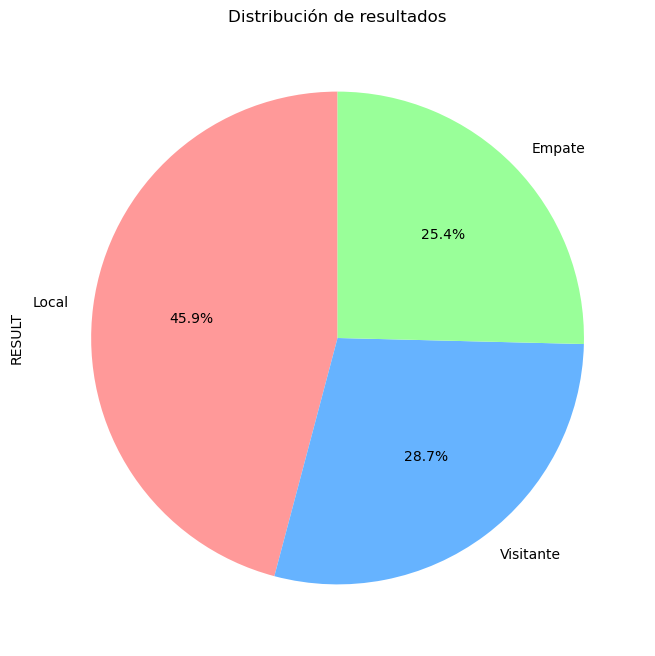

In [3]:
# muestra en un pie chart la distribucion de los resultados, 0:Local, 1:Empate, 2:Visitante
plt.figure(figsize=(8, 8))

matches['RESULT'].replace({0: 'Local', 1: 'Empate', 2: 'Visitante'}).value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Distribución de resultados')
plt.show()

In [7]:
# muestra en un dataframe la distribucion de la clase resultado en %, para cada pais
distribucion_resultados = pd.DataFrame()


distribucion_resultados['Local'] = matches.groupby('country_id')['RESULT'].apply(lambda x: (x == 0).sum() / x.count() * 100)
distribucion_resultados['Empate'] = matches.groupby('country_id')['RESULT'].apply(lambda x: (x == 1).sum() / x.count() * 100)
distribucion_resultados['Visitante'] = matches.groupby('country_id')['RESULT'].apply(lambda x: (x == 2).sum() / x.count() * 100)

distribucion_resultados.index = distribucion_resultados.index.map(leagues.set_index('id')['name'])
# Redondea los valores a un decimal
distribucion_resultados = distribucion_resultados.round(1)
distribucion_resultados

,Local,Empate,Visitante
country_id,,,
Belgium Jupiler League,46.9,24.6,28.5
England Premier League,45.7,25.8,28.5
France Ligue 1,44.7,28.3,27.0
Germany 1. Bundesliga,45.2,24.4,30.4
Italy Serie A,46.6,26.4,27.0
Netherlands Eredivisie,47.8,23.7,28.4
Poland Ekstraklasa,45.3,27.3,27.3
Portugal Liga ZON Sagres,44.2,26.0,29.8
Scotland Premier League,41.7,24.5,33.8


In [121]:
# muestra la media de local, empate, visitante de distribucion_resultados
distribucion_resultados[['Local', 'Empate','Visitante']].mean().round(1)

Local        45.7
Empate       25.3
Visitante    29.0
dtype: float64

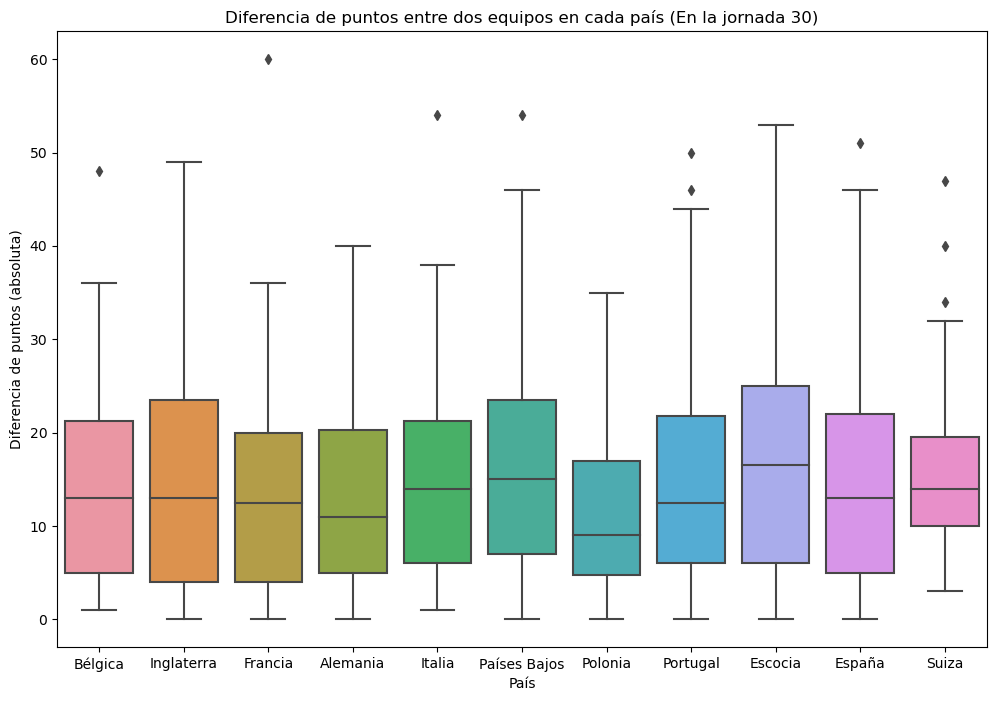

In [122]:
# Filtrar los datos hasta la jornada 30
matches_filtered = matches[matches['stage'] == 30]

plt.figure(figsize=(12, 8))
sns.boxplot(x='country_id', y=matches_filtered['PTS_DIFF'].abs(), data=matches_filtered)
plt.title('Diferencia de puntos entre dos equipos en cada país (En la jornada 30)')
plt.xlabel('País')
plt.ylabel('Diferencia de puntos (absoluta)')
plt.xticks(ticks=range(0, 11), labels=['Bélgica','Inglaterra','Francia','Alemania','Italia', 'Países Bajos', 'Polonia', 'Portugal', 'Escocia', 'España', 'Suiza'])
plt.savefig(os.path.join('visualizaciones', "pts_difference_country_stage_30.png"))
plt.show()


## Análisis bivariado

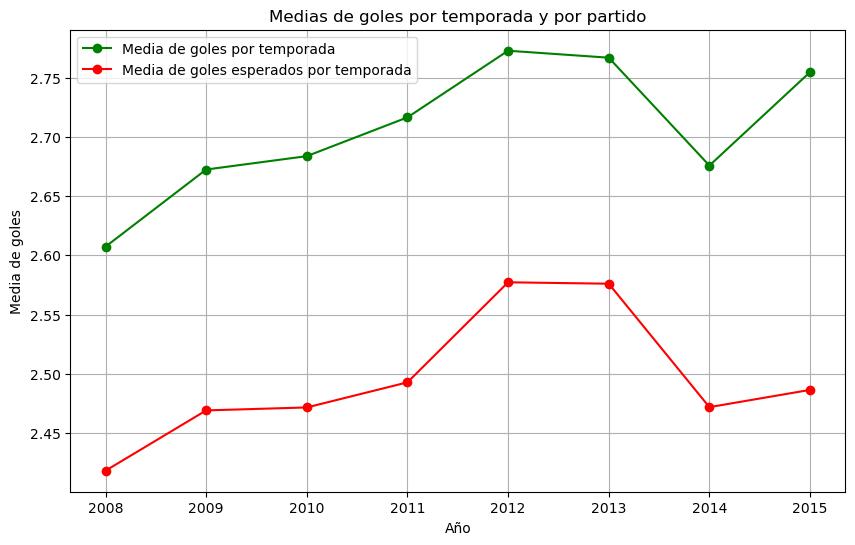

In [123]:
# Calcular las medias de goles para cada año
avg_goals_per_year = matches.groupby('year')[['home_team_goal', 'away_team_goal']].mean().sum(axis=1)

# Calcular las medias de goles esperados para cada año
avg_expected_goals_per_year = matches.groupby('year')[['xG_H', 'xG_A']].mean().sum(axis=1)

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Línea verde: medias de goles por temporada
plt.plot(avg_goals_per_year.index, avg_goals_per_year.values, marker='o', color='green', label='Media de goles por temporada')

# Línea roja: medias de goles esperados por temporada
plt.plot(avg_expected_goals_per_year.index, avg_expected_goals_per_year.values, marker='o', color='red', label='Media de goles esperados por temporada')

# Configuraciones del gráfico
plt.xlabel('Año')
plt.ylabel('Media de goles')
plt.title('Medias de goles por temporada y por partido')
plt.legend()
plt.grid(True)

plt.show()

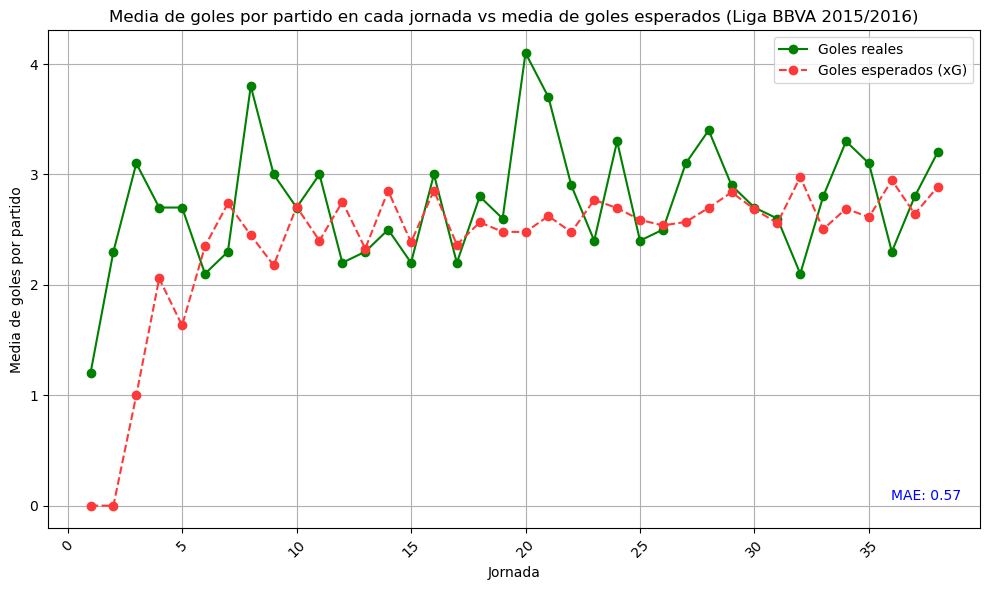

In [111]:
# Filtrar los datos del año 2015
matches_spain_2015 = matches_spain[matches_spain['year'] == 2015]

# Calcular las medias de goles para cada etapa
avg_goals_per_year_stage = matches_spain_2015.groupby(['stage'])[['home_team_goal', 'away_team_goal']].mean().sum(axis=1)

# Calcular las medias de goles esperados para cada etapa
avg_expected_goals_per_year_stage = matches_spain_2015.groupby(['stage'])[['xG_H', 'xG_A']].mean().sum(axis=1)

# Calcular el error absoluto medio (MAE)
mae_error = np.mean(np.abs(avg_goals_per_year_stage.values - avg_expected_goals_per_year_stage.values))

# Crear el índice para el gráfico
index = avg_goals_per_year_stage.index

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Línea verde: medias de goles por temporada y etapa
plt.plot(index, avg_goals_per_year_stage.values, marker='o', color='green', label='Goles reales')

# Línea roja: medias de goles esperados por temporada y etapa
plt.plot(index, avg_expected_goals_per_year_stage.values, marker='o', color='#FE3939', label='Goles esperados (xG)', linestyle='--')

# Configuraciones del gráfico
plt.xlabel('Jornada')
plt.ylabel('Media de goles por partido')
plt.title('Media de goles por partido en cada jornada vs media de goles esperados (Liga BBVA 2015/2016)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.text(0.98, 0.05, f'MAE: {mae_error:.2f}', ha='right', va='bottom', transform=plt.gca().transAxes, color='blue')

plt.tight_layout()
plt.savefig(os.path.join('visualizaciones', "media_goles_vs_xG.png"))
plt.show()


In [125]:
# CÓDIGO EXTRAIDO DE LA DOCUMENTACIÓN DE LA LIBRERÍA MPL_SOCCER -> https://mplsoccer.readthedocs.io/en/latest/gallery/pizza_plots/plot_pizza_colorful.html#sphx-glr-gallery-pizza-plots-plot-pizza-colorful-py

font_normal = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/'
                          'src/hinted/Roboto-Regular.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/'
                          'src/hinted/Roboto-Italic.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab[wght].ttf')

# Team logos
URL_city = "https://as01.epimg.net/img/comunes/fotos/fichas/equipos/large/66.png"
man_city = Image.open(urlopen(URL_city))

URL_united = "https://upload.wikimedia.org/wikipedia/en/thumb/7/7a/Manchester_United_FC_crest.svg/1200px-Manchester_United_FC_crest.svg.png"
man_united = Image.open(urlopen(URL_united))

# Parameters and values for both teams
params = ["POR", "DEF", "MC", "DEL"]
values_city = matches[(matches['home_team_api_id']==10260) & (matches['away_team_api_id']==8456) & (matches['year']==2014)][['A_VAL_MEDIA_POR', 'A_VAL_MEDIA_DEF','A_VAL_MEDIA_MC','A_VAL_MEDIA_DEL']].iloc[0].values
values_united = matches[(matches['home_team_api_id']==10260) & (matches['away_team_api_id']==8456) & (matches['year']==2014)][['L_VAL_MEDIA_POR', 'L_VAL_MEDIA_DEF','L_VAL_MEDIA_MC','L_VAL_MEDIA_DEL']].iloc[0].values

# Colors
slice_colors = ["#1A78CF", "#FF9300", "#D70232", "#009933"]
text_colors = ["#000000"] * 4

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8.5), subplot_kw=dict(polar=True))

# Plot pizza for Manchester United
baker.make_pizza(
    values_united,                      # list of values
    ax=axs[0],                          # specify axes
    color_blank_space="same",           # use same color to fill blank space
    slice_colors=slice_colors,          # color for individual slices
    value_colors=text_colors,           # color for the value-text
    value_bck_colors=slice_colors,      # color for the blank spaces
    blank_alpha=0.4,                    # alpha for blank-space colors
    kwargs_slices=dict(edgecolor="#F2F2F2", zorder=2, linewidth=1),  # values to be used when plotting slices
    kwargs_params=dict(color="#000000", fontsize=11, fontproperties=font_normal.prop, va="center"),  # values to be used when adding parameter
    kwargs_values=dict(color="#000000", fontsize=11, fontproperties=font_normal.prop, zorder=3,
                       bbox=dict(edgecolor="#000000", facecolor="cornflowerblue", boxstyle="round,pad=0.2", lw=1)),
)
# Add Manchester United logo
add_image(man_united, fig, left=0.254, bottom=0.45, width=0.095, height=0.095)

# Plot pizza for Manchester City
baker.make_pizza(
    values_city,                        # list of values
    ax=axs[1],                          # specify axes
    color_blank_space="same",           # use same color to fill blank space
    slice_colors=slice_colors,          # color for individual slices
    value_colors=text_colors,           # color for the value-text
    value_bck_colors=slice_colors,      # color for the blank spaces
    blank_alpha=0.4,                    # alpha for blank-space colors
    kwargs_slices=dict(edgecolor="#F2F2F2", zorder=2, linewidth=1),  # values to be used when plotting slices
    kwargs_params=dict(color="#000000", fontsize=11, fontproperties=font_normal.prop, va="center"),  # values to be used when adding parameter
    kwargs_values=dict(color="#000000", fontsize=11, fontproperties=font_normal.prop, zorder=3,
                       bbox=dict(edgecolor="#000000", facecolor="cornflowerblue", boxstyle="round,pad=0.2", lw=1)),
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.22, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.35, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.5, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.68, 0.9225), 0.025, 0.021, fill=True, color="#009933",
        transform=fig.transFigure, figure=fig
    ),
])


# Add Manchester City logo
add_image(man_city, fig, left=0.666, bottom=0.437, width=0.115, height=0.115)

# Add title and subtitles
fig.text(0.515, 0.975, "Valoración por posiciones Manchester United vs Manchester City", size=16, ha="center", fontproperties=font_bold.prop, color="#000000")
fig.text(0.515, 0.953, "Premier League 2013/2014 - Jornada 28", size=13, ha="center", fontproperties=font_bold.prop, color="#000000")
fig.text(0.25, 0.925, "Portero                              Defensas                                Mediocentros                                Delanteros", size=14, fontproperties=font_bold.prop, color="#000000")


plt.savefig(os.path.join('visualizaciones', "valoracion_por_posiciones.png"))
# Show the graph
plt.show()


[83.0, 77.0, 80.0, 82.0, 83.0]
[82.0, 82.0, 84.0, 83.0, 82.0]


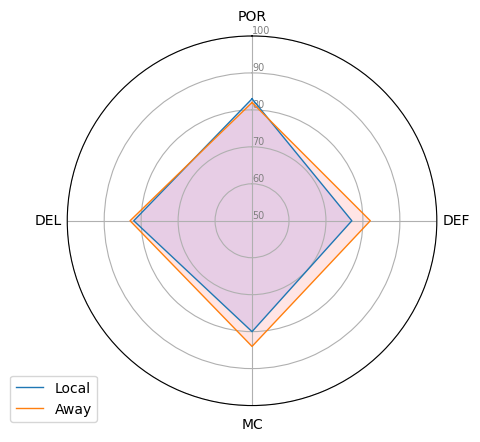

In [5]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
import random

# Assuming you have a DataFrame called 'matches' containing the data

# Select a random match
random_match = matches[(matches['home_team_api_id']==10260) & (matches['away_team_api_id']==8456) & (matches['year']==2014)]

# Extract data for the selected match
local_values = random_match[['L_VAL_MEDIA_POR', 'L_VAL_MEDIA_DEF', 'L_VAL_MEDIA_MC', 'L_VAL_MEDIA_DEL']].values.flatten().tolist()
away_values = random_match[['A_VAL_MEDIA_POR', 'A_VAL_MEDIA_DEF', 'A_VAL_MEDIA_MC', 'A_VAL_MEDIA_DEL']].values.flatten().tolist()

categories = ['POR', 'DEF', 'MC', 'DEL']

# Number of variables
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([50, 60, 70, 80, 90, 100], ["50","60","70","80","90","100"], color="grey", size=7)
plt.ylim(50, 100)

# Plot data for the local team
local_values += local_values[:1]
ax.plot(angles, local_values, linewidth=1, linestyle='solid', label="Local")
ax.fill(angles, local_values, 'b', alpha=0.1)

# Plot data for the away team
away_values += away_values[:1]
ax.plot(angles, away_values, linewidth=1, linestyle='solid', label="Away")
ax.fill(angles, away_values, 'r', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()


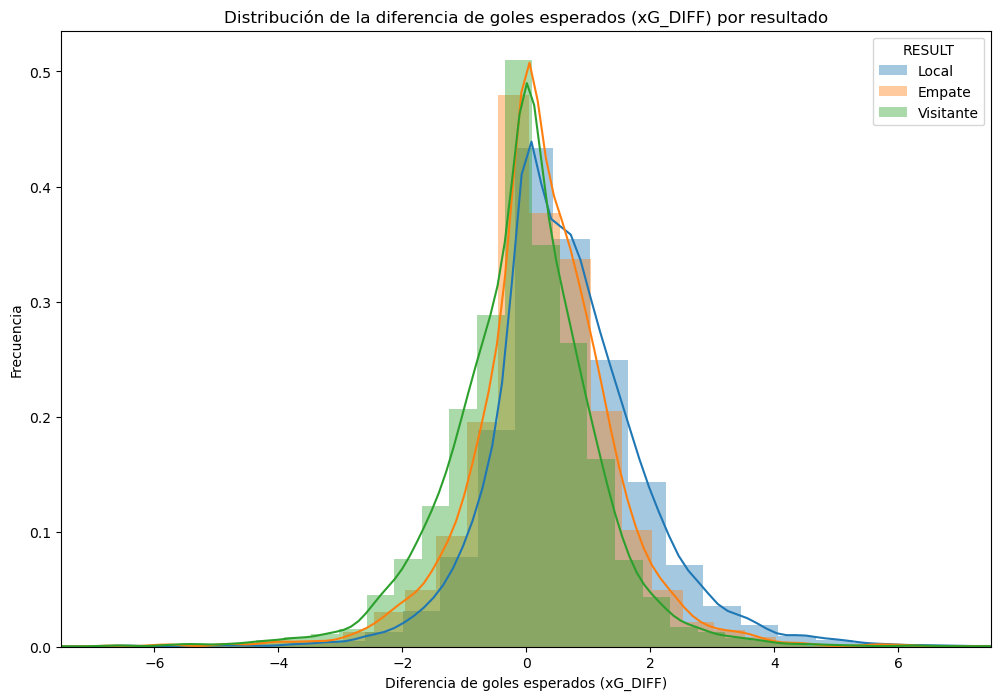

In [197]:
plt.figure(figsize=(12, 8))

sns.distplot(matches['xG_DIFF'][matches['RESULT'] == 0], kde=True,  label='Local')
sns.distplot(matches['xG_DIFF'][matches['RESULT'] == 1], kde=True,  label='Empate')
sns.distplot(matches['xG_DIFF'][matches['RESULT'] == 2], kde=True,  label='Visitante')


plt.title('Distribución de la diferencia de goles esperados (xG_DIFF) por resultado')
plt.xlabel('Diferencia de goles esperados (xG_DIFF)')
plt.ylabel('Frecuencia')
plt.legend(title='RESULT')
plt.xlim(-7.5, 7.5)
plt.show()





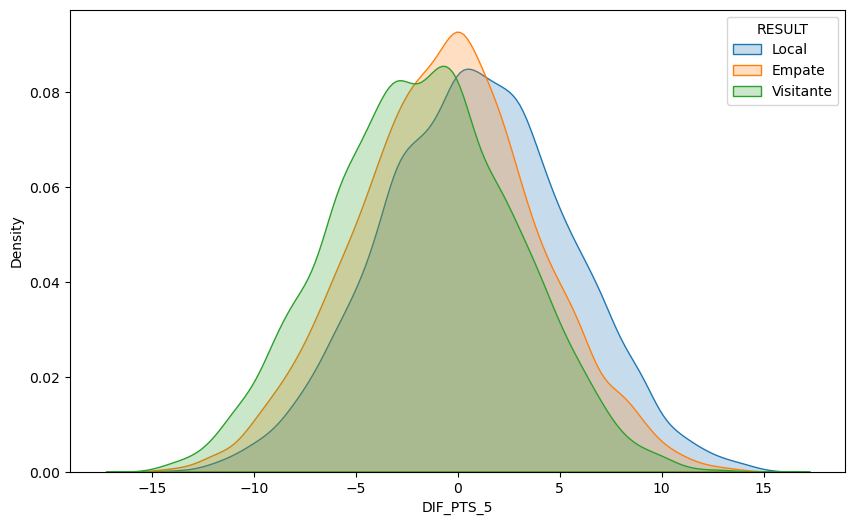

In [112]:
plt.figure(figsize=(10, 6))

sns.kdeplot(matches['DIF_PTS_5'][matches['RESULT'] == 0], fill=True,  label='Local')
sns.kdeplot(matches['DIF_PTS_5'][matches['RESULT'] == 1], fill=True, label='Empate')
sns.kdeplot(matches['DIF_PTS_5'][matches['RESULT'] == 2], fill=True, label='Visitante')

plt.legend(title='RESULT')
plt.savefig(os.path.join('visualizaciones', "dif_pts_5.png"))
plt.show()

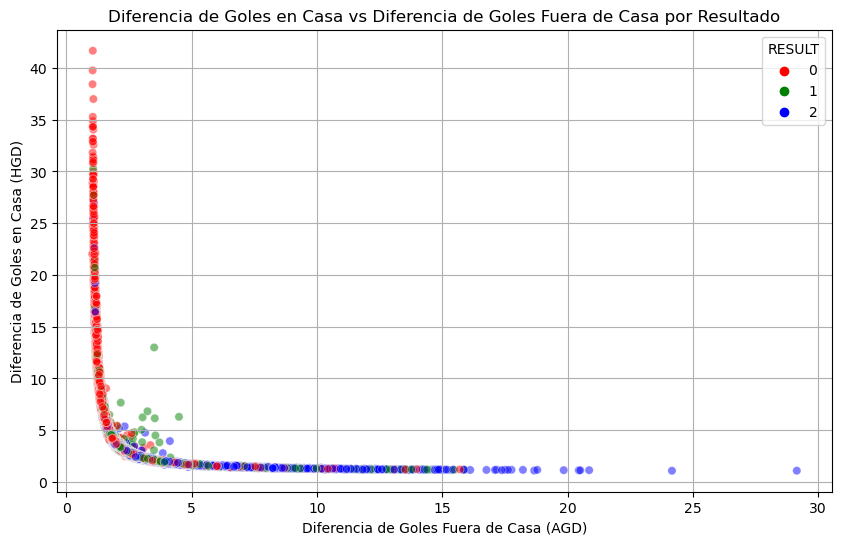

In [199]:
# Crear el gráfico de puntos
plt.figure(figsize=(10, 6))

custom_palette = {0: 'red', 1: 'green', 2: 'blue'}

# Graficar los puntos para cada resultado
sns.scatterplot(x='CUOTA_L', y='CUOTA_V', hue='RESULT', data=matches, palette=custom_palette, alpha=0.5)

# Configuraciones adicionales
plt.title('Diferencia de Goles en Casa vs Diferencia de Goles Fuera de Casa por Resultado')
plt.xlabel('Diferencia de Goles Fuera de Casa (AGD)')
plt.ylabel('Diferencia de Goles en Casa (HGD)')
plt.legend(title='RESULT')
plt.grid(True)

# Mostrar el gráfico
plt.show()


In [200]:
import plotly.express as px

# Seleccionar una muestra aleatoria de los datos
sample_matches = matches.sample(frac=0.1)  # Por ejemplo, 10% de los datos

# Utilizamos la muestra para el gráfico
fig = px.scatter_3d(sample_matches, x='Cuota_local', y='CUOTA_E', z='Cuota_visitante',
                     color='RESULT', opacity=0.5)

# Configuración adicional
fig.update_layout(scene=dict(xaxis_title='C. local',
                             yaxis_title='C. empate',
                             zaxis_title='C. visitante'),
                  width=900,  # Ancho de la imagen
                  height=700) # Alto de la imagen

# Mostrar el gráfico
fig.show()

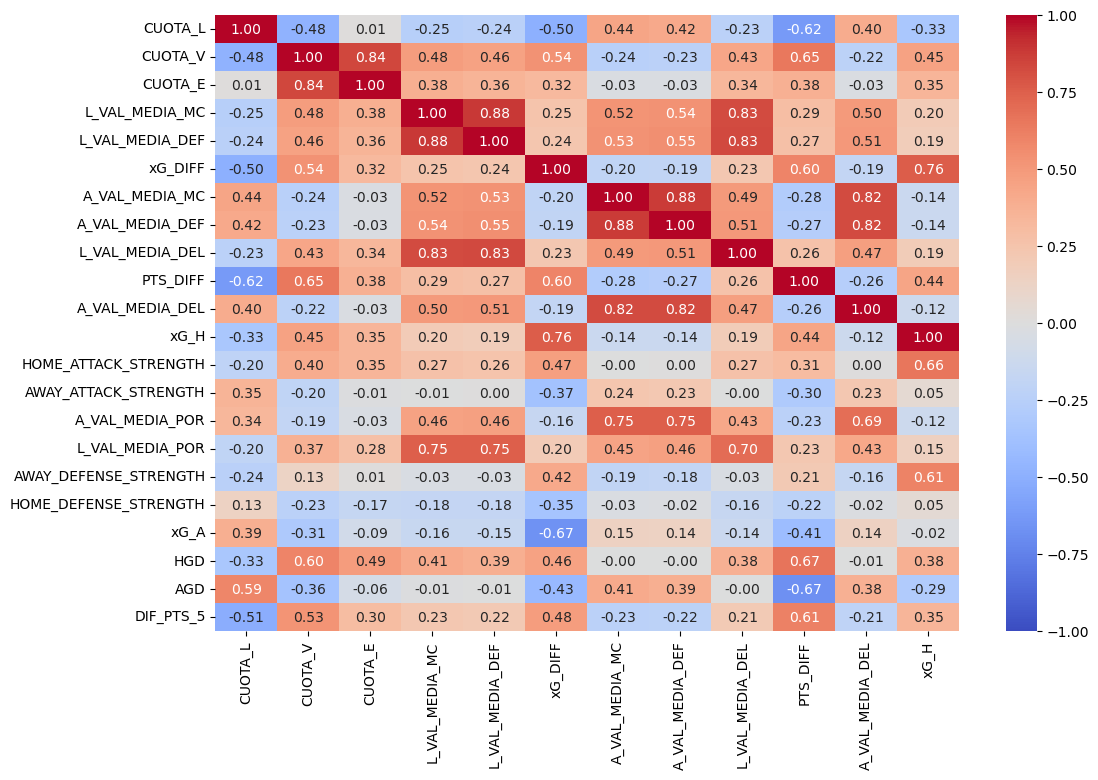

In [113]:
correlation_matrix = matches[['CUOTA_L', 'CUOTA_V', 'CUOTA_E', 'L_VAL_MEDIA_MC', 
                              'L_VAL_MEDIA_DEF', 'xG_DIFF', 'A_VAL_MEDIA_MC', 'A_VAL_MEDIA_DEF', 'L_VAL_MEDIA_DEL', 
                              'PTS_DIFF', 'A_VAL_MEDIA_DEL', 'xG_H', 'HOME_ATTACK_STRENGTH', 'AWAY_ATTACK_STRENGTH', 
                              'A_VAL_MEDIA_POR', 'L_VAL_MEDIA_POR', 'AWAY_DEFENSE_STRENGTH', 'HOME_DEFENSE_STRENGTH', 'xG_A',
                                'HGD','AGD', 'DIF_PTS_5' ]].corr()

correlation_matrix_first_half = correlation_matrix.iloc[:, :len(correlation_matrix.columns)//2 + 1]

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_first_half, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.savefig(os.path.join('visualizaciones', "correlation_matrix_1.png"), bbox_inches='tight')
plt.show()


In [4]:
print("Matriz de correlación (Primera mitad del eje x):")
for i, col in enumerate(correlation_matrix.columns):
    for j in range(i+1, len(correlation_matrix.columns)):
        print(f"{col} - {correlation_matrix.columns[j]} -> {correlation_matrix.iloc[i, j]:.2f}")

Matriz de correlación (Primera mitad del eje x):
Cuota_local - Cuota_visitante -> -0.48
Cuota_local - Cuota_empate -> 0.01
Cuota_local - L_VAL_MEDIA_MC -> -0.25
Cuota_local - L_VAL_MEDIA_DEF -> -0.24
Cuota_local - xG_DIFF -> -0.50
Cuota_local - A_VAL_MEDIA_MC -> 0.44
Cuota_local - A_VAL_MEDIA_DEF -> 0.42
Cuota_local - L_VAL_MEDIA_DEL -> -0.23
Cuota_local - PtsDifference -> -0.62
Cuota_local - A_VAL_MEDIA_DEL -> 0.40
Cuota_local - xG_H -> -0.33
Cuota_local - HOME_ATTACK_STRENGTH -> -0.20
Cuota_local - AWAY_ATTACK_STRENGTH -> 0.35
Cuota_local - A_VAL_MEDIA_POR -> 0.34
Cuota_local - L_VAL_MEDIA_POR -> -0.20
Cuota_local - AWAY_DEFENSE_STRENGTH -> -0.24
Cuota_local - HOME_DEFENSE_STRENGTH -> 0.13
Cuota_local - xG_A -> 0.39
Cuota_local - HGD -> -0.33
Cuota_local - AGD -> 0.59
Cuota_local - DIF_PTS_5 -> -0.51
Cuota_visitante - Cuota_empate -> 0.84
Cuota_visitante - L_VAL_MEDIA_MC -> 0.48
Cuota_visitante - L_VAL_MEDIA_DEF -> 0.46
Cuota_visitante - xG_DIFF -> 0.54
Cuota_visitante - A_VAL_MEDIA_

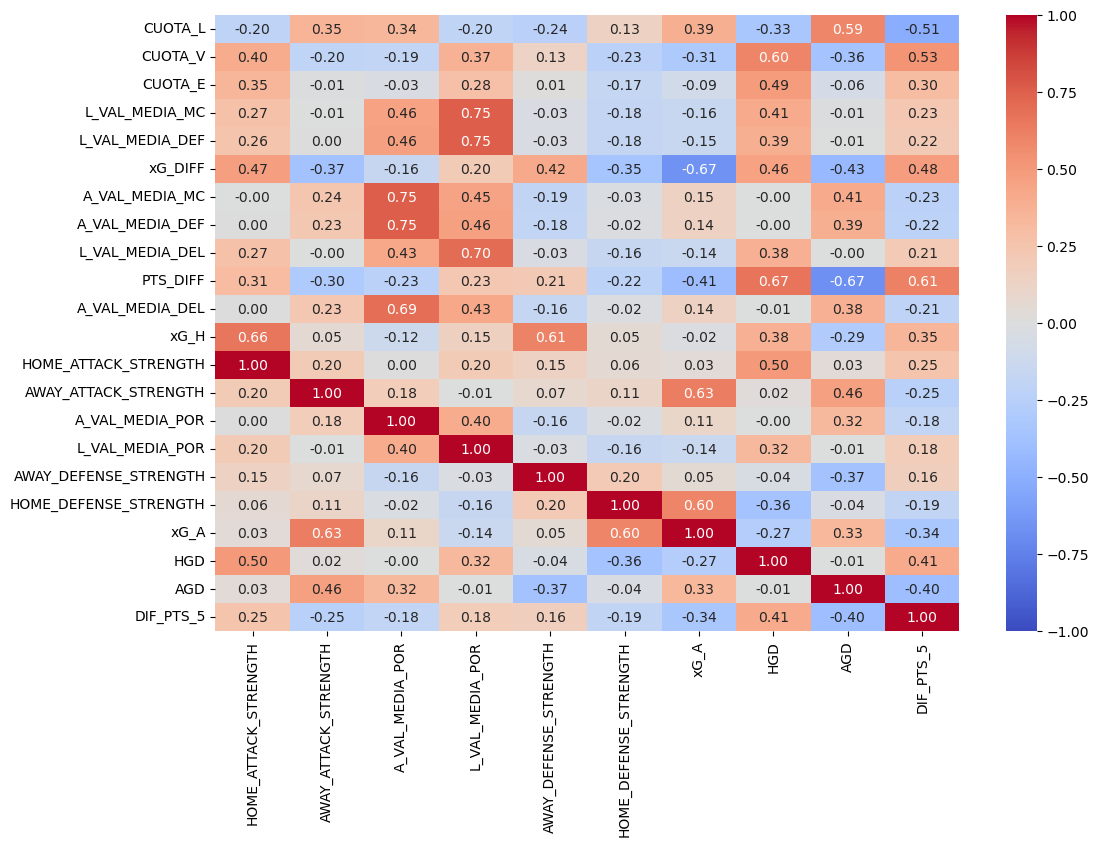

In [114]:
correlation_matrix_second_half = correlation_matrix.iloc[:, len(correlation_matrix.columns)//2 +1:]

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix_second_half, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, vmin=-1, vmax=1)
plt.savefig(os.path.join('visualizaciones', "correlation_matrix_2.png"), bbox_inches='tight')
plt.show()

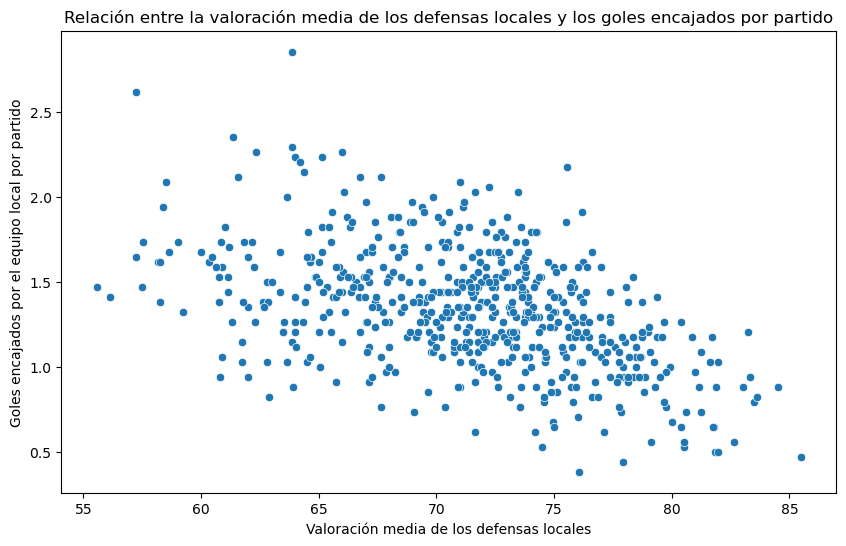

In [32]:
# show the relation between L_VAL_MEDIA_DEF and the goal conceded by the home team per match
plt.figure(figsize=(10, 6))
matches_stage_34 = matches[matches.stage == 34]
matches_stage_34['HGC_normalized'] = matches_stage_34['HGC'] / 34
sns.scatterplot(data=matches_stage_34, x='L_VAL_MEDIA_DEF', y='HGC_normalized')
plt.title('Relación entre la valoración media de los defensas locales y los goles encajados por partido')
plt.xlabel('Valoración media de los defensas locales')
plt.ylabel('Goles encajados por el equipo local por partido')
plt.show()

C:\Users\pablo\AppData\Local\Temp\ipykernel_17544\2834655171.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_stage_34['HGS_normalized'] = matches_stage_34['HGS'] / 34
c:\Users\pablo\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pablo\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


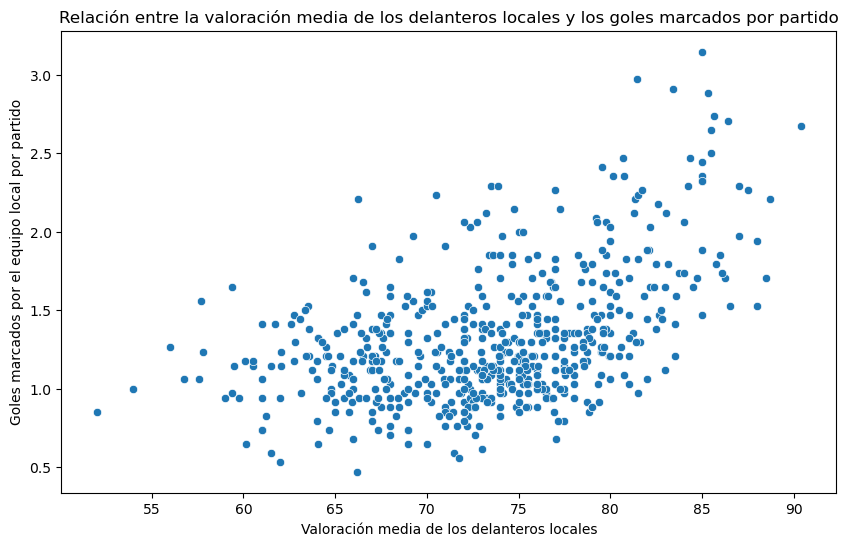

In [5]:
# show the relation between L_VAL_MEDIA_DEL and the goal scored by the home team per match
plt.figure(figsize=(10, 6))
matches_stage_34 = matches[matches.stage == 34]
matches_stage_34['HGS_normalized'] = matches_stage_34['HGS'] / 34
sns.scatterplot(data=matches_stage_34, x='L_VAL_MEDIA_DEL', y='HGS_normalized')
plt.title('Relación entre la valoración media de los delanteros locales y los goles marcados por partido')
plt.xlabel('Valoración media de los delanteros locales')
plt.ylabel('Goles marcados por el equipo local por partido')
plt.show()

Correlación entre PtDifference y resultado: -0.2956194021405421


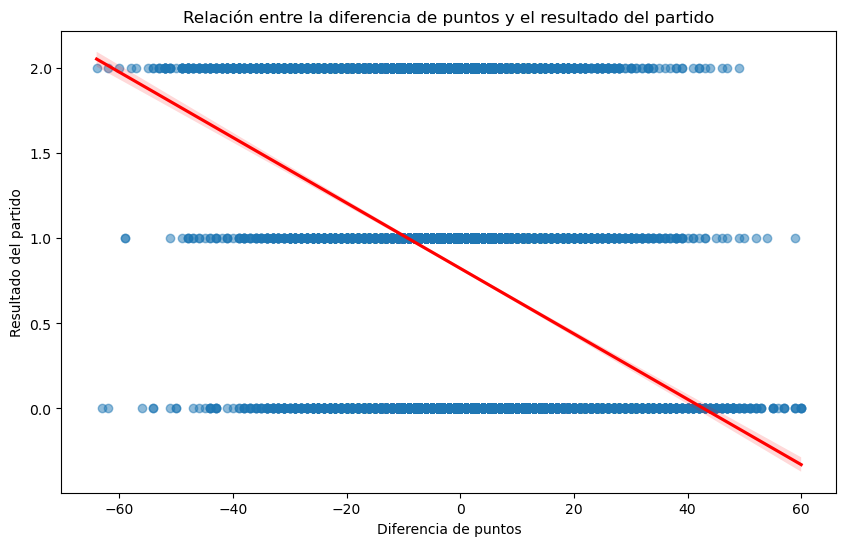

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation between PtDifference and resultado
correlation = matches[['PTS_DIFF', 'RESULT']].corr().iloc[0, 1]
print("Correlación entre PtDifference y resultado:", correlation)

# Show the relation between PtDifference and the result of the match in a scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(data=matches, x='PTS_DIFF', y='RESULT', scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})

plt.title('Relación entre la diferencia de puntos y el resultado del partido')
plt.xlabel('Diferencia de puntos')
plt.ylabel('Resultado del partido')
plt.show()


In [ ]:
def entropy(y):
    # Calculate the entropy of a given set of labels
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return -np.sum(probabilities * np.log2(probabilities + 1e-10))  # Adding a small value to avoid log(0)

def information_gain(X, y, feature_name):
    # Calculate information gain for a specific feature
    entropy_before = entropy(y)
    unique_values = X[feature_name].unique()
    entropy_after = 0
    for value in unique_values:
        subset_y = y[X[feature_name] == value]
        entropy_after += len(subset_y) / len(y) * entropy(subset_y)
    return entropy_before - entropy_after 

""" def information_gain(X, y, feature_name):
    # Discretize the numeric feature
    bins = np.histogram_bin_edges(X[feature_name], bins='auto')
    X_discretized = pd.cut(X[feature_name], bins=bins, include_lowest=True, right=True)
    print(X_discretized)
    # Calculate information gain for the discretized feature
    entropy_before = entropy(y)
    entropy_after = 0

    for value in X_discretized.unique():
        subset_y = y[X_discretized == value]
        entropy_after += len(subset_y) / len(y) * entropy(subset_y)

    return entropy_before - entropy_after """


# Drop the target variable, select the numeric features
X = matches.drop(columns=['match_api_id', 'RESULT', 'home_team_goal', 'away_team_goal', 'year', 'stage', 'country_id', 'league_id', 'season', 'home_team_api_id', 'away_team_api_id'])

# Drop the target variable
y = matches['RESULT']

# Drop rows with NaN values
X = X.dropna()

# Calculate information gain for each feature
info_gain = []
for feature_name in X.columns:
    gain = information_gain(X, y[X.index], feature_name)
    info_gain.append(gain)

# Create a DataFrame to display the information gain
info_gain_df = pd.DataFrame({'feature': X.columns, 'info_gain': info_gain})
info_gain_df = info_gain_df.sort_values(by='info_gain', ascending=False)

# Display the information gain
plt.figure(figsize=(10, 6))
sns.barplot(data=info_gain_df, x='info_gain', y='feature', palette='viridis')
plt.title('Ganancia de información entre las características y el resultado')
plt.xlabel('Ganancia de información')
plt.show()

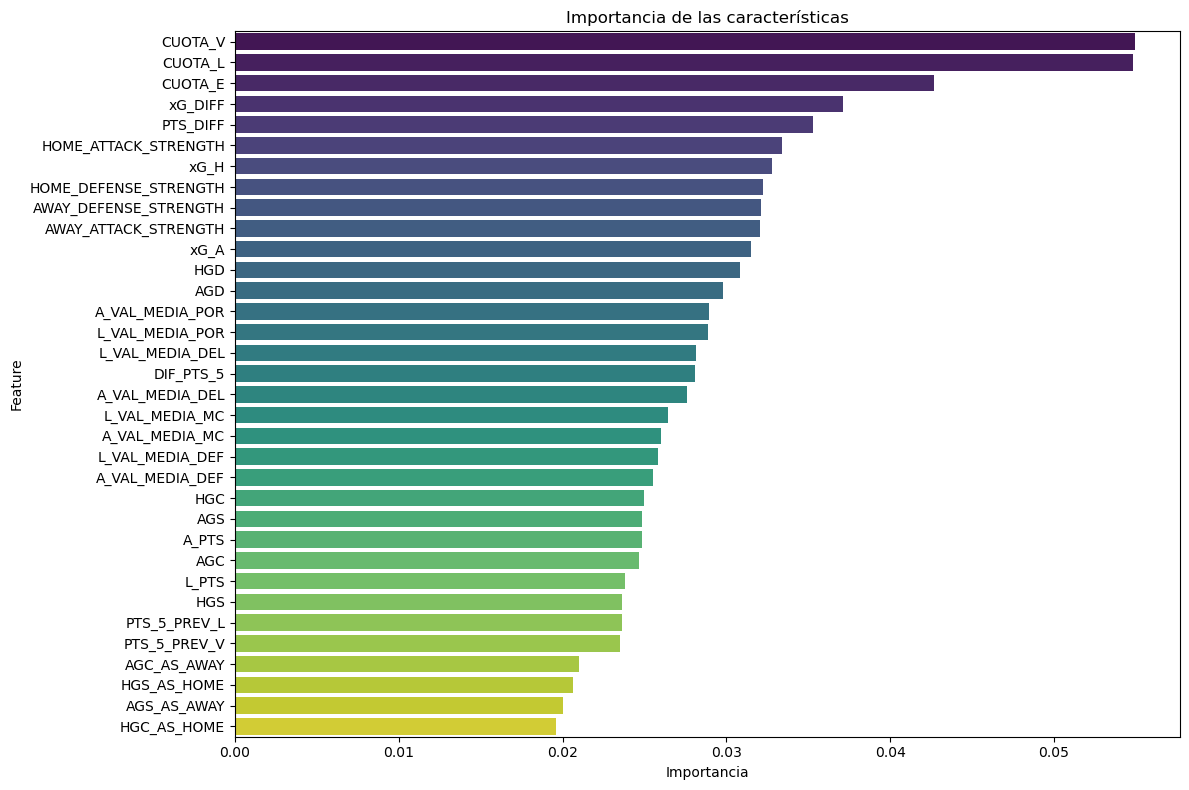

In [115]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Supongamos que tienes tu conjunto de datos 'matches' y 'RESULT'

# Elimina la columna 'RESULT' de las características
X = matches.drop(columns=['match_api_id', 'RESULT', 'home_team_goal', 'away_team_goal', 'year', 'stage', 'country_id', 'league_id', 'season', 'home_team_api_id', 'away_team_api_id'])

# Define 'RESULT' como la variable objetivo
y = matches['RESULT']

# Crea un clasificador de Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrena el clasificador
rf_classifier.fit(X, y)

# Obtiene la relevancia de las características
feature_importances = rf_classifier.feature_importances_

# Crea un DataFrame para visualizar la relevancia de las características
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Ordena las características por su importancia
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the information gain
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Importancia de las características')
plt.xlabel('Importancia')
#guardamos la figura
plt.tight_layout()
plt.savefig(os.path.join('visualizaciones', "feature_importance.png"))
plt.show()

In [191]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Suponiendo que tienes tu conjunto de datos 'matches'

# Dividir los datos en conjunto de entrenamiento y prueba
train = matches_spain[matches_spain['stage'] <= matches_spain['stage'].max() - 8]
test = matches_spain[matches_spain['stage'] > matches_spain['stage'].max() - 8]

# Features y target para entrenamiento
X_train = train.drop(columns=['match_api_id', 'RESULT', 'home_team_goal', 'away_team_goal', 'year', 'stage', 'country_id', 'league_id', 'season', 'home_team_api_id', 'away_team_api_id'])
y_train = train['RESULT']

# Features y target para prueba
X_test = test.drop(columns=['match_api_id', 'RESULT', 'home_team_goal', 'away_team_goal', 'year', 'stage', 'country_id', 'league_id', 'season', 'home_team_api_id', 'away_team_api_id'])
y_test = test['RESULT']

# Inicializar y entrenar el clasificador Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = rf_classifier.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.515625


In [111]:
matches_spain

,country_id,league_id,season,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,year,...,AGC_AS_HOME,AGC_AS_AWAY,HGS_AS_HOME,HGS_AS_AWAY,AGS_AS_HOME,AGS_AS_AWAY,N_MATCHES_AWAY_AS_AWAY,N_MATCHES_HOME_AS_HOME,xG_H,xG_A
21517,21518,21518,2008/2009,1,530023,10267,8661,3,0,2008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
21518,21518,21518,2008/2009,1,530090,8558,10281,1,0,2008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
21519,21518,21518,2008/2009,1,530084,8371,10205,1,1,2008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
21520,21518,21518,2008/2009,1,530085,9783,8633,2,1,2008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
21521,21518,21518,2008/2009,1,530086,8388,8634,1,0,2008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24552,21518,21518,2015/2016,38,2030530,9869,10205,2,0,2016,...,NaN,21.0,26.0,NaN,NaN,18.0,18.0,18.0,1.233062,1.272727
24553,21518,21518,2015/2016,38,2030531,8603,8305,2,1,2016,...,NaN,45.0,15.0,NaN,NaN,13.0,18.0,18.0,1.524390,0.722222
24554,21518,21518,2015/2016,38,2030532,8558,8372,4,2,2016,...,NaN,35.0,18.0,NaN,NaN,21.0,18.0,18.0,1.422764,1.378788
24555,21518,21518,2015/2016,38,2030535,9864,8306,4,1,2016,...,NaN,32.0,22.0,NaN,NaN,19.0,18.0,18.0,1.589883,0.671717


Mean Accuracy: 0.5078356628547225


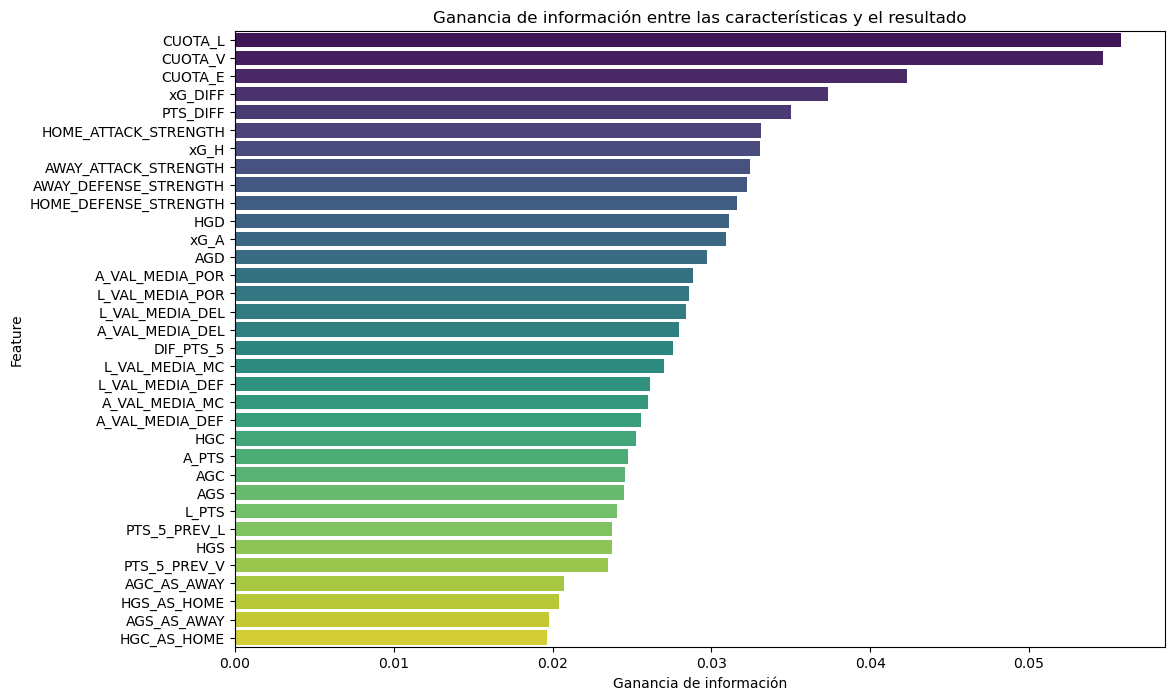

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score
import pandas as pd

# Suponiendo que tienes tu conjunto de datos 'matches'
matches = matches.sort_values(by=['year', 'stage'])

# Definir las características y la variable objetivo
X = matches.drop(columns=['match_api_id', 'RESULT', 'home_team_goal', 'away_team_goal', 'year', 'stage', 'country_id', 'league_id', 'season', 'home_team_api_id', 'away_team_api_id'])
y = matches['RESULT']

# Inicializar el clasificador Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Inicializar la división de series temporales
tscv = TimeSeriesSplit(n_splits=10)

# Lista para almacenar las puntuaciones de precisión
accuracies = []

# Iterar sobre las divisiones de series temporales
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrenar el clasificador
    rf_classifier.fit(X_train, y_train)

    # Predecir y evaluar
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Calcular la precisión promedio
mean_accuracy = sum(accuracies) / len(accuracies)
print("Mean Accuracy:", mean_accuracy)

# Obtiene la relevancia de las características
feature_importances = rf_classifier.feature_importances_

# Crea un DataFrame para visualizar la relevancia de las características
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Ordena las características por su importancia
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the information gain
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Ganancia de información entre las características y el resultado')
plt.xlabel('Ganancia de información')
plt.show()

In [192]:
#muestra el numero de valores perdidos
prueba = matches.isna().sum()
prueba[prueba > 0]

Cuota_local        3382
Cuota_empate       3382
Cuota_visitante    3382
L_VAL_MEDIA_POR    2109
L_VAL_MEDIA_DEF    1833
L_VAL_MEDIA_MC     1833
L_VAL_MEDIA_DEL    2028
A_VAL_MEDIA_POR    2117
A_VAL_MEDIA_DEF    1832
A_VAL_MEDIA_MC     1834
A_VAL_MEDIA_DEL    2035
dtype: int64

In [100]:
matches.year

0        2008
1        2008
2        2008
3        2008
4        2008
         ... 
25974    2016
25975    2016
25976    2016
25977    2016
25978    2016
Name: year, Length: 25979, dtype: int32

In [112]:
#muestramos el numero de valores perdidos para las estadísticas del partido
ligas_vp = matches.groupby(['league_id','year'])[['POS_L', 'POS_V', 'TIROS_P_L', 'TIROS_P_V', 'TIROS_L', 'TIROS_V', 'COR_L', 'COR_V', 'CEN_L', 'CEN_V', 'FALTAS_L', 'FALTAS_V']].apply(lambda x: x.isna().sum())
# suma el total de valores perdidos
total_valores_perdidos = ligas_vp.sum(axis=1)

# Eliminar las columnas especificadas
ligas_vp = ligas_vp.drop(columns=['POS_L', 'POS_V', 'TIROS_P_L', 'TIROS_P_V', 'TIROS_L', 'TIROS_V', 'COR_L', 'COR_V', 'CEN_L', 'CEN_V', 'FALTAS_L', 'FALTAS_V'])

# Agregar la columna total_valores_perdidos
ligas_vp['total_valores_perdidos'] = total_valores_perdidos
#mostramos el nombre de cada liga
ligas_vp['league_id'] = ligas_vp.index.get_level_values('league_id')
ligas_vp['league_id'] = ligas_vp['league_id'].map(leagues.set_index('id')['name'])
ligas_vp

total_valores_perdidos                 league_id
league_id year                                                  
1         2008                    1836    Belgium Jupiler League
          2009                    3564    Belgium Jupiler League
          2010                    2736    Belgium Jupiler League
          2011                    2760    Belgium Jupiler League
          2012                    3168    Belgium Jupiler League
...                                ...                       ...
24558     2012                    1944  Switzerland Super League
          2013                    2148  Switzerland Super League
          2014                    2172  Switzerland Super League
          2015                    2160  Switzerland Super League
          2016                    1080  Switzerland Super League

[99 rows x 2 columns]

In [113]:
# Guardamos nuesto conjunto de datos en formato csv
ligas_vp.to_csv("ligas_vp_TOTAL.csv", index=True)